In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.3
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [23]:
from sklearn.model_selection import train_test_split

#train_test_split可以设置train和test的大小，默认test_size=0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [25]:
# 函数式API 功能API
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数: f(x) = h(g(x))

concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs = [input],
                           outputs = [output])

# model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

In [26]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples


Epoch 1/100
   32/11610 [..............................] - ETA: 35s - loss: 6.2358

 1184/11610 [==>...........................] - ETA: 1s - loss: 6.2394 



 2400/11610 [=====>........................] - ETA: 0s - loss: 5.2275

 3616/11610 [========>.....................] - ETA: 0s - loss: 4.4896

 4992/11610 [===========>..................] - ETA: 0s - loss: 3.8256

 6272/11610 [===============>..............] - ETA: 0s - loss: 3.3823

 7264/11610 [=================>............] - ETA: 0s - loss: 3.1175



 8384/11610 [====================>.........] - ETA: 0s - loss: 2.8864

 9344/11610 [=======================>......] - ETA: 0s - loss: 2.6889

10496/11610 [==========================>...] - ETA: 0s - loss: 2.5442

11584/11610 [============================>.] - ETA: 0s - loss: 2.3906

11610/11610 [==============================] - 1s 71us/sample - loss: 2.3892 - val_loss: 1.0410


Epoch 2/100
   32/11610 [..............................] - ETA: 1s - loss: 1.0589

 1248/11610 [==>...........................] - ETA: 0s - loss: 0.8798

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.8180

 4032/11610 [=========>....................] - ETA: 0s - loss: 0.7910

 5344/11610 [============>.................] - ETA: 0s - loss: 0.7779

 6624/11610 [================>.............] - ETA: 0s - loss: 0.7543

 8000/11610 [===================>..........] - ETA: 0s - loss: 0.7460



 9376/11610 [=======================>......] - ETA: 0s - loss: 0.7359

10400/11610 [=========================>....] - ETA: 0s - loss: 0.7272

11488/11610 [============================>.] - ETA: 0s - loss: 0.7243

11610/11610 [==============================] - 1s 49us/sample - loss: 0.7223 - val_loss: 0.7579


Epoch 3/100
   32/11610 [..............................] - ETA: 0s - loss: 0.5580

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.6640

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.6962

 4160/11610 [=========>....................] - ETA: 0s - loss: 0.6969

 5504/11610 [=============>................] - ETA: 0s - loss: 0.6747

 6816/11610 [================>.............] - ETA: 0s - loss: 0.6626

 8128/11610 [====================>.........] - ETA: 0s - loss: 0.6658

 9472/11610 [=======================>......] - ETA: 0s - loss: 0.6621



10880/11610 [===========================>..] - ETA: 0s - loss: 0.6573



11610/11610 [==============================] - 1s 46us/sample - loss: 0.6547 - val_loss: 0.7185


Epoch 4/100
   32/11610 [..............................] - ETA: 1s - loss: 0.7915

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.5844

 2784/11610 [======>.......................] - ETA: 0s - loss: 0.6106

 4128/11610 [=========>....................] - ETA: 0s - loss: 0.6067

 5536/11610 [=============>................] - ETA: 0s - loss: 0.6203

 6976/11610 [=================>............] - ETA: 0s - loss: 0.6121

 8416/11610 [====================>.........] - ETA: 0s - loss: 0.6159

 9824/11610 [========================>.....] - ETA: 0s - loss: 0.6160

11232/11610 [============================>.] - ETA: 0s - loss: 0.6208

11610/11610 [==============================] - 1s 45us/sample - loss: 0.6189 - val_loss: 0.6766


Epoch 5/100
   32/11610 [..............................] - ETA: 0s - loss: 0.3155

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.6063

 2496/11610 [=====>........................] - ETA: 0s - loss: 0.5827

 3808/11610 [========>.....................] - ETA: 0s - loss: 0.5955

 5248/11610 [============>.................] - ETA: 0s - loss: 0.6188

 6624/11610 [================>.............] - ETA: 0s - loss: 0.6137

 8032/11610 [===================>..........] - ETA: 0s - loss: 0.6071

 9440/11610 [=======================>......] - ETA: 0s - loss: 0.6030



10880/11610 [===========================>..] - ETA: 0s - loss: 0.5985

11610/11610 [==============================] - 1s 46us/sample - loss: 0.5949 - val_loss: 0.6507


Epoch 6/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5647

 1376/11610 [==>...........................] - ETA: 0s - loss: 0.6389

 2784/11610 [======>.......................] - ETA: 0s - loss: 0.6239

 4256/11610 [=========>....................] - ETA: 0s - loss: 0.6020

 5632/11610 [=============>................] - ETA: 0s - loss: 0.5814

 7008/11610 [=================>............] - ETA: 0s - loss: 0.5833

 8448/11610 [====================>.........] - ETA: 0s - loss: 0.5810



 9824/11610 [========================>.....] - ETA: 0s - loss: 0.5734

11200/11610 [===========================>..] - ETA: 0s - loss: 0.5729

11610/11610 [==============================] - 1s 45us/sample - loss: 0.5726 - val_loss: 0.6608


Epoch 7/100
   32/11610 [..............................] - ETA: 0s - loss: 0.7710

 1312/11610 [==>...........................] - ETA: 0s - loss: 0.5947

 2656/11610 [=====>........................] - ETA: 0s - loss: 0.5478

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.5514

 5472/11610 [=============>................] - ETA: 0s - loss: 0.5405

 6816/11610 [================>.............] - ETA: 0s - loss: 0.5610



 8224/11610 [====================>.........] - ETA: 0s - loss: 0.5567

 9568/11610 [=======================>......] - ETA: 0s - loss: 0.5563

11008/11610 [===========================>..] - ETA: 0s - loss: 0.5618

11610/11610 [==============================] - 1s 45us/sample - loss: 0.5590 - val_loss: 0.6049


Epoch 8/100
   32/11610 [..............................] - ETA: 0s - loss: 0.5428

 1280/11610 [==>...........................] - ETA: 0s - loss: 0.5744

 2688/11610 [=====>........................] - ETA: 0s - loss: 0.5621

 4096/11610 [=========>....................] - ETA: 0s - loss: 0.5631

 5472/11610 [=============>................] - ETA: 0s - loss: 0.5600

 6912/11610 [================>.............] - ETA: 0s - loss: 0.5485

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.5501



 9792/11610 [========================>.....] - ETA: 0s - loss: 0.5438

11104/11610 [===========================>..] - ETA: 0s - loss: 0.5412

11610/11610 [==============================] - 1s 45us/sample - loss: 0.5439 - val_loss: 0.5934


Epoch 9/100
   32/11610 [..............................] - ETA: 1s - loss: 0.8007

 1376/11610 [==>...........................] - ETA: 0s - loss: 0.4913

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.5157

 4192/11610 [=========>....................] - ETA: 0s - loss: 0.5480

 5600/11610 [=============>................] - ETA: 0s - loss: 0.5526

 6976/11610 [=================>............] - ETA: 0s - loss: 0.5510

 8256/11610 [====================>.........] - ETA: 0s - loss: 0.5397

 9632/11610 [=======================>......] - ETA: 0s - loss: 0.5388

11104/11610 [===========================>..] - ETA: 0s - loss: 0.5337

11610/11610 [==============================] - 1s 45us/sample - loss: 0.5320 - val_loss: 0.5740


Epoch 10/100
   32/11610 [..............................] - ETA: 1s - loss: 0.4931

 1312/11610 [==>...........................] - ETA: 0s - loss: 0.5308

 2784/11610 [======>.......................] - ETA: 0s - loss: 0.5368

 4160/11610 [=========>....................] - ETA: 0s - loss: 0.5216

 5568/11610 [=============>................] - ETA: 0s - loss: 0.5117

 6976/11610 [=================>............] - ETA: 0s - loss: 0.5139

 8416/11610 [====================>.........] - ETA: 0s - loss: 0.5213

 9792/11610 [========================>.....] - ETA: 0s - loss: 0.5280

11200/11610 [===========================>..] - ETA: 0s - loss: 0.5224

11610/11610 [==============================] - 1s 45us/sample - loss: 0.5224 - val_loss: 0.5679


Epoch 11/100
   32/11610 [..............................] - ETA: 1s - loss: 0.4969

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.5137

 2496/11610 [=====>........................] - ETA: 0s - loss: 0.4906

 3808/11610 [========>.....................] - ETA: 0s - loss: 0.5032

 5216/11610 [============>.................] - ETA: 0s - loss: 0.5109

 6592/11610 [================>.............] - ETA: 0s - loss: 0.5120

 8000/11610 [===================>..........] - ETA: 0s - loss: 0.5076

 9344/11610 [=======================>......] - ETA: 0s - loss: 0.5105

10784/11610 [==========================>...] - ETA: 0s - loss: 0.5167

11610/11610 [==============================] - 1s 46us/sample - loss: 0.5140 - val_loss: 0.5555


Epoch 12/100
   32/11610 [..............................] - ETA: 1s - loss: 1.0261



 1312/11610 [==>...........................] - ETA: 0s - loss: 0.5113

 2656/11610 [=====>........................] - ETA: 0s - loss: 0.5020

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.5064

 5408/11610 [============>.................] - ETA: 0s - loss: 0.5172



 6816/11610 [================>.............] - ETA: 0s - loss: 0.5121

 8160/11610 [====================>.........] - ETA: 0s - loss: 0.5081

 9600/11610 [=======================>......] - ETA: 0s - loss: 0.5048

11040/11610 [===========================>..] - ETA: 0s - loss: 0.5102

11610/11610 [==============================] - 1s 46us/sample - loss: 0.5065 - val_loss: 0.5508


Epoch 13/100


   32/11610 [..............................] - ETA: 1s - loss: 0.5804

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4885

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.5174

 4128/11610 [=========>....................] - ETA: 0s - loss: 0.5102

 5536/11610 [=============>................] - ETA: 0s - loss: 0.5037

 6912/11610 [================>.............] - ETA: 0s - loss: 0.4980

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.4944

 9792/11610 [========================>.....] - ETA: 0s - loss: 0.4941

11168/11610 [===========================>..] - ETA: 0s - loss: 0.5000

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4998 - val_loss: 0.5429


Epoch 14/100
   32/11610 [..............................] - ETA: 1s - loss: 0.4740

 1312/11610 [==>...........................] - ETA: 0s - loss: 0.4711

 2688/11610 [=====>........................] - ETA: 0s - loss: 0.4563

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.4733

 5504/11610 [=============>................] - ETA: 0s - loss: 0.4990

 6944/11610 [================>.............] - ETA: 0s - loss: 0.5020

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.5038

 9760/11610 [========================>.....] - ETA: 0s - loss: 0.4997

11168/11610 [===========================>..] - ETA: 0s - loss: 0.4955

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4933 - val_loss: 0.5319


Epoch 15/100
   32/11610 [..............................] - ETA: 0s - loss: 0.2704

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4430

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.4843

 4096/11610 [=========>....................] - ETA: 0s - loss: 0.5028

 5376/11610 [============>.................] - ETA: 0s - loss: 0.5054

 6496/11610 [===============>..............] - ETA: 0s - loss: 0.5104

 7936/11610 [===================>..........] - ETA: 0s - loss: 0.5095

 9248/11610 [======================>.......] - ETA: 0s - loss: 0.4970



10656/11610 [==========================>...] - ETA: 0s - loss: 0.4851

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4890 - val_loss: 0.5280


Epoch 16/100
   32/11610 [..............................] - ETA: 0s - loss: 0.3402

 1408/11610 [==>...........................] - ETA: 0s - loss: 0.4696

 2816/11610 [======>.......................] - ETA: 0s - loss: 0.4726

 4256/11610 [=========>....................] - ETA: 0s - loss: 0.4557

 5440/11610 [=============>................] - ETA: 0s - loss: 0.4583

 6432/11610 [===============>..............] - ETA: 0s - loss: 0.4677

 7520/11610 [==================>...........] - ETA: 0s - loss: 0.4747

 8896/11610 [=====================>........] - ETA: 0s - loss: 0.4867

10176/11610 [=========================>....] - ETA: 0s - loss: 0.4868

11584/11610 [============================>.] - ETA: 0s - loss: 0.4850



11610/11610 [==============================] - 1s 48us/sample - loss: 0.4846 - val_loss: 0.5317


Epoch 17/100
   32/11610 [..............................] - ETA: 1s - loss: 0.7111

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.5284

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.4991

 4160/11610 [=========>....................] - ETA: 0s - loss: 0.4643

 5568/11610 [=============>................] - ETA: 0s - loss: 0.4674

 6912/11610 [================>.............] - ETA: 0s - loss: 0.4674

 8320/11610 [====================>.........] - ETA: 0s - loss: 0.4747

 9632/11610 [=======================>......] - ETA: 0s - loss: 0.4783

11040/11610 [===========================>..] - ETA: 0s - loss: 0.4836

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4779 - val_loss: 0.5151


Epoch 18/100
   32/11610 [..............................] - ETA: 1s - loss: 0.3488

 1376/11610 [==>...........................] - ETA: 0s - loss: 0.5071

 2784/11610 [======>.......................] - ETA: 0s - loss: 0.5055

 4160/11610 [=========>....................] - ETA: 0s - loss: 0.4878

 5536/11610 [=============>................] - ETA: 0s - loss: 0.4847

 6688/11610 [================>.............] - ETA: 0s - loss: 0.4779

 8064/11610 [===================>..........] - ETA: 0s - loss: 0.4764

 9472/11610 [=======================>......] - ETA: 0s - loss: 0.4789

10880/11610 [===========================>..] - ETA: 0s - loss: 0.4699

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4725 - val_loss: 0.5212


Epoch 19/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5993



 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4811

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.4502

 4032/11610 [=========>....................] - ETA: 0s - loss: 0.4609

 5344/11610 [============>.................] - ETA: 0s - loss: 0.4566



 6752/11610 [================>.............] - ETA: 0s - loss: 0.4559

 8096/11610 [===================>..........] - ETA: 0s - loss: 0.4597

 9408/11610 [=======================>......] - ETA: 0s - loss: 0.4584

10784/11610 [==========================>...] - ETA: 0s - loss: 0.4644

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4689 - val_loss: 0.5390


Epoch 20/100


   32/11610 [..............................] - ETA: 0s - loss: 0.5162



 1312/11610 [==>...........................] - ETA: 0s - loss: 0.4461

 2592/11610 [=====>........................] - ETA: 0s - loss: 0.4493

 3968/11610 [=========>....................] - ETA: 0s - loss: 0.4428

 5344/11610 [============>.................] - ETA: 0s - loss: 0.4540

 6720/11610 [================>.............] - ETA: 0s - loss: 0.4598

 8064/11610 [===================>..........] - ETA: 0s - loss: 0.4637

 9408/11610 [=======================>......] - ETA: 0s - loss: 0.4678



10784/11610 [==========================>...] - ETA: 0s - loss: 0.4628



11610/11610 [==============================] - 1s 47us/sample - loss: 0.4645 - val_loss: 0.4963


Epoch 21/100
   32/11610 [..............................] - ETA: 1s - loss: 0.3122



 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4199

 2656/11610 [=====>........................] - ETA: 0s - loss: 0.4317

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.4485

 5440/11610 [=============>................] - ETA: 0s - loss: 0.4472



 6880/11610 [================>.............] - ETA: 0s - loss: 0.4552

 8224/11610 [====================>.........] - ETA: 0s - loss: 0.4604

 9600/11610 [=======================>......] - ETA: 0s - loss: 0.4609

11008/11610 [===========================>..] - ETA: 0s - loss: 0.4612

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4601 - val_loss: 0.5119


Epoch 22/100
   32/11610 [..............................] - ETA: 0s - loss: 1.5499

 1248/11610 [==>...........................] - ETA: 0s - loss: 0.4519

 2656/11610 [=====>........................] - ETA: 0s - loss: 0.4472

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.4718

 5408/11610 [============>.................] - ETA: 0s - loss: 0.4593

 6816/11610 [================>.............] - ETA: 0s - loss: 0.4576

 8256/11610 [====================>.........] - ETA: 0s - loss: 0.4533



 9600/11610 [=======================>......] - ETA: 0s - loss: 0.4515

10880/11610 [===========================>..] - ETA: 0s - loss: 0.4501

11610/11610 [==============================] - 1s 48us/sample - loss: 0.4570 - val_loss: 0.5042


Epoch 23/100
   32/11610 [..............................] - ETA: 1s - loss: 0.7668

 1280/11610 [==>...........................] - ETA: 0s - loss: 0.4540

 2336/11610 [=====>........................] - ETA: 0s - loss: 0.4392

 3552/11610 [========>.....................] - ETA: 0s - loss: 0.4434

 4960/11610 [===========>..................] - ETA: 0s - loss: 0.4450

 6336/11610 [===============>..............] - ETA: 0s - loss: 0.4468

 7744/11610 [===================>..........] - ETA: 0s - loss: 0.4567

 9120/11610 [======================>.......] - ETA: 0s - loss: 0.4548

10560/11610 [==========================>...] - ETA: 0s - loss: 0.4538



11610/11610 [==============================] - 1s 47us/sample - loss: 0.4519 - val_loss: 0.4819


Epoch 24/100
   32/11610 [..............................] - ETA: 0s - loss: 0.2786



 1312/11610 [==>...........................] - ETA: 0s - loss: 0.4534

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.4654

 4000/11610 [=========>....................] - ETA: 0s - loss: 0.4504

 5408/11610 [============>.................] - ETA: 0s - loss: 0.4521

 6752/11610 [================>.............] - ETA: 0s - loss: 0.4459

 8096/11610 [===================>..........] - ETA: 0s - loss: 0.4466

 9504/11610 [=======================>......] - ETA: 0s - loss: 0.4514

10912/11610 [===========================>..] - ETA: 0s - loss: 0.4512

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4507 - val_loss: 0.4792


Epoch 25/100
   32/11610 [..............................] - ETA: 0s - loss: 0.4177



 1376/11610 [==>...........................] - ETA: 0s - loss: 0.4281

 2560/11610 [=====>........................] - ETA: 0s - loss: 0.4348

 3936/11610 [=========>....................] - ETA: 0s - loss: 0.4463

 5056/11610 [============>.................] - ETA: 0s - loss: 0.4338

 6432/11610 [===============>..............] - ETA: 0s - loss: 0.4508

 7872/11610 [===================>..........] - ETA: 0s - loss: 0.4492

 9248/11610 [======================>.......] - ETA: 0s - loss: 0.4473

10656/11610 [==========================>...] - ETA: 0s - loss: 0.4481



11610/11610 [==============================] - 1s 47us/sample - loss: 0.4463 - val_loss: 0.4845


Epoch 26/100
   32/11610 [..............................] - ETA: 1s - loss: 0.3847



 1120/11610 [=>............................] - ETA: 0s - loss: 0.4567

 2432/11610 [=====>........................] - ETA: 0s - loss: 0.4540

 3840/11610 [========>.....................] - ETA: 0s - loss: 0.4644

 5216/11610 [============>.................] - ETA: 0s - loss: 0.4475



 6624/11610 [================>.............] - ETA: 0s - loss: 0.4353

 7968/11610 [===================>..........] - ETA: 0s - loss: 0.4415

 9344/11610 [=======================>......] - ETA: 0s - loss: 0.4448

10688/11610 [==========================>...] - ETA: 0s - loss: 0.4399

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4435 - val_loss: 0.4728


Epoch 27/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5430

 1408/11610 [==>...........................] - ETA: 0s - loss: 0.4383

 2784/11610 [======>.......................] - ETA: 0s - loss: 0.4262

 4192/11610 [=========>....................] - ETA: 0s - loss: 0.4415

 5600/11610 [=============>................] - ETA: 0s - loss: 0.4409

 7008/11610 [=================>............] - ETA: 0s - loss: 0.4348

 8384/11610 [====================>.........] - ETA: 0s - loss: 0.4398



 9792/11610 [========================>.....] - ETA: 0s - loss: 0.4385

10976/11610 [===========================>..] - ETA: 0s - loss: 0.4417

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4397 - val_loss: 0.4665


Epoch 28/100
   32/11610 [..............................] - ETA: 0s - loss: 0.1993

 1376/11610 [==>...........................] - ETA: 0s - loss: 0.4165

 2816/11610 [======>.......................] - ETA: 0s - loss: 0.4274

 4160/11610 [=========>....................] - ETA: 0s - loss: 0.4370

 5536/11610 [=============>................] - ETA: 0s - loss: 0.4479

 6944/11610 [================>.............] - ETA: 0s - loss: 0.4534

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.4464

 9696/11610 [========================>.....] - ETA: 0s - loss: 0.4380

11072/11610 [===========================>..] - ETA: 0s - loss: 0.4393

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4365 - val_loss: 0.4893


Epoch 29/100
   32/11610 [..............................] - ETA: 1s - loss: 0.3678

 1408/11610 [==>...........................] - ETA: 0s - loss: 0.4353

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.4372

 4160/11610 [=========>....................] - ETA: 0s - loss: 0.4408

 5600/11610 [=============>................] - ETA: 0s - loss: 0.4435

 6976/11610 [=================>............] - ETA: 0s - loss: 0.4361

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.4359

 9728/11610 [========================>.....] - ETA: 0s - loss: 0.4352



11104/11610 [===========================>..] - ETA: 0s - loss: 0.4345



11610/11610 [==============================] - 1s 46us/sample - loss: 0.4350 - val_loss: 0.4707


Epoch 30/100
   32/11610 [..............................] - ETA: 1s - loss: 0.3866

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4312

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.4438

 4128/11610 [=========>....................] - ETA: 0s - loss: 0.4283

 5504/11610 [=============>................] - ETA: 0s - loss: 0.4222

 6848/11610 [================>.............] - ETA: 0s - loss: 0.4255



 8160/11610 [====================>.........] - ETA: 0s - loss: 0.4335

 9504/11610 [=======================>......] - ETA: 0s - loss: 0.4296

10912/11610 [===========================>..] - ETA: 0s - loss: 0.4267

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4311 - val_loss: 0.4763


Epoch 31/100
   32/11610 [..............................] - ETA: 0s - loss: 0.2945

 1376/11610 [==>...........................] - ETA: 0s - loss: 0.4218

 2816/11610 [======>.......................] - ETA: 0s - loss: 0.4457

 4000/11610 [=========>....................] - ETA: 0s - loss: 0.4419

 5408/11610 [============>.................] - ETA: 0s - loss: 0.4313

 6784/11610 [================>.............] - ETA: 0s - loss: 0.4286

 8064/11610 [===================>..........] - ETA: 0s - loss: 0.4284

 9440/11610 [=======================>......] - ETA: 0s - loss: 0.4321

10816/11610 [==========================>...] - ETA: 0s - loss: 0.4326

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4285 - val_loss: 0.4546


Epoch 32/100
   32/11610 [..............................] - ETA: 0s - loss: 0.3665

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4029

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.3999

 4128/11610 [=========>....................] - ETA: 0s - loss: 0.4167

 5568/11610 [=============>................] - ETA: 0s - loss: 0.4104

 6944/11610 [================>.............] - ETA: 0s - loss: 0.4204

 8064/11610 [===================>..........] - ETA: 0s - loss: 0.4323

 9312/11610 [=======================>......] - ETA: 0s - loss: 0.4308

10592/11610 [==========================>...] - ETA: 0s - loss: 0.4297

11610/11610 [==============================]

 - 1s 46us/sample - loss: 0.4256 - val_loss: 0.4513


Epoch 33/100
   32/11610 [..............................] - ETA: 1s - loss: 0.2240



 1312/11610 [==>...........................] - ETA: 0s - loss: 0.3758

 2656/11610 [=====>........................] - ETA: 0s - loss: 0.3926

 3968/11610 [=========>....................] - ETA: 0s - loss: 0.4033



 5312/11610 [============>.................] - ETA: 0s - loss: 0.4045

 6624/11610 [================>.............] - ETA: 0s - loss: 0.4135

 8064/11610 [===================>..........] - ETA: 0s - loss: 0.4226



 9408/11610 [=======================>......] - ETA: 0s - loss: 0.4223

10784/11610 [==========================>...] - ETA: 0s - loss: 0.4236

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4229 - val_loss: 0.4469


Epoch 34/100
   32/11610 [..............................] - ETA: 0s - loss: 0.2409

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4170

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.4436

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.4362

 5440/11610 [=============>................] - ETA: 0s - loss: 0.4319

 6848/11610 [================>.............] - ETA: 0s - loss: 0.4222

 8224/11610 [====================>.........] - ETA: 0s - loss: 0.4277

 9600/11610 [=======================>......] - ETA: 0s - loss: 0.4260

11040/11610 [===========================>..] - ETA: 0s - loss: 0.4224

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4215 - val_loss: 0.4458


Epoch 35/100
   32/11610 [..............................] - ETA: 0s - loss: 0.2784

 1440/11610 [==>...........................] - ETA: 0s - loss: 0.4069

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.4140

 3648/11610 [========>.....................] - ETA: 0s - loss: 0.4158

 4800/11610 [===========>..................] - ETA: 0s - loss: 0.4223

 6176/11610 [==============>...............] - ETA: 0s - loss: 0.4247

 7520/11610 [==================>...........] - ETA: 0s - loss: 0.4233



 8960/11610 [======================>.......] - ETA: 0s - loss: 0.4177

10272/11610 [=========================>....] - ETA: 0s - loss: 0.4229

11584/11610 [============================>.] - ETA: 0s - loss: 0.4176



11610/11610 [==============================] - 1s 48us/sample - loss: 0.4185 - val_loss: 0.4483


Epoch 36/100
   32/11610 [..............................] - ETA: 1s - loss: 0.2083

 1248/11610 [==>...........................] - ETA: 0s - loss: 0.3616

 2496/11610 [=====>........................] - ETA: 0s - loss: 0.3965

 3904/11610 [=========>....................] - ETA: 0s - loss: 0.4026

 5280/11610 [============>.................] - ETA: 0s - loss: 0.3997

 6688/11610 [================>.............] - ETA: 0s - loss: 0.4091

 8128/11610 [====================>.........] - ETA: 0s - loss: 0.4061

 9504/11610 [=======================>......] - ETA: 0s - loss: 0.4082

10912/11610 [===========================>..] - ETA: 0s - loss: 0.4145

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4155 - val_loss: 0.4405


Epoch 37/100
   32/11610 [..............................] - ETA: 0s - loss: 0.7818

 1280/11610 [==>...........................] - ETA: 0s - loss: 0.4483

 2688/11610 [=====>........................] - ETA: 0s - loss: 0.4239

 4096/11610 [=========>....................] - ETA: 0s - loss: 0.4258



 5504/11610 [=============>................] - ETA: 0s - loss: 0.4241

 6784/11610 [================>.............] - ETA: 0s - loss: 0.4123

 8192/11610 [====================>.........] - ETA: 0s - loss: 0.4134

 9600/11610 [=======================>......] - ETA: 0s - loss: 0.4099

10944/11610 [===========================>..] - ETA: 0s - loss: 0.4136

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4135 - val_loss: 0.4391


Epoch 38/100


   32/11610 [..............................] - ETA: 1s - loss: 0.4801

 1280/11610 [==>...........................] - ETA: 0s - loss: 0.4060

 2656/11610 [=====>........................] - ETA: 0s - loss: 0.4096

 4000/11610 [=========>....................] - ETA: 0s - loss: 0.4034



 5376/11610 [============>.................] - ETA: 0s - loss: 0.3967

 6720/11610 [================>.............] - ETA: 0s - loss: 0.4012

 8160/11610 [====================>.........] - ETA: 0s - loss: 0.4046

 9536/11610 [=======================>......] - ETA: 0s - loss: 0.4071

11008/11610 [===========================>..] - ETA: 0s - loss: 0.4113

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4114 - val_loss: 0.4336


Epoch 39/100


   32/11610 [..............................] - ETA: 1s - loss: 0.4212

 1312/11610 [==>...........................] - ETA: 0s - loss: 0.3880

 2688/11610 [=====>........................] - ETA: 0s - loss: 0.3939

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.4030

 5440/11610 [=============>................] - ETA: 0s - loss: 0.3937

 6848/11610 [================>.............] - ETA: 0s - loss: 0.4020

 8224/11610 [====================>.........] - ETA: 0s - loss: 0.4091

 9568/11610 [=======================>......] - ETA: 0s - loss: 0.4087



10976/11610 [===========================>..] - ETA: 0s - loss: 0.4079

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4098 - val_loss: 0.4360


Epoch 40/100


   32/11610 [..............................] - ETA: 0s - loss: 0.7321

 1216/11610 [==>...........................] - ETA: 0s - loss: 0.3634

 2528/11610 [=====>........................] - ETA: 0s - loss: 0.4086

 3808/11610 [========>.....................] - ETA: 0s - loss: 0.3967

 5152/11610 [============>.................] - ETA: 0s - loss: 0.3885

 6592/11610 [================>.............] - ETA: 0s - loss: 0.3949

 8000/11610 [===================>..........] - ETA: 0s - loss: 0.4022

 9376/11610 [=======================>......] - ETA: 0s - loss: 0.4045



10816/11610 [==========================>...] - ETA: 0s - loss: 0.4048



11610/11610 [==============================] - 1s 46us/sample - loss: 0.4074 - val_loss: 0.4294


Epoch 41/100
   32/11610 [..............................] - ETA: 1s - loss: 0.3949

 1088/11610 [=>............................] - ETA: 0s - loss: 0.4074

 2400/11610 [=====>........................] - ETA: 0s - loss: 0.3985

 3776/11610 [========>.....................] - ETA: 0s - loss: 0.3993

 5152/11610 [============>.................] - ETA: 0s - loss: 0.3968

 6528/11610 [===============>..............] - ETA: 0s - loss: 0.4045



 7904/11610 [===================>..........] - ETA: 0s - loss: 0.4066

 9216/11610 [======================>.......] - ETA: 0s - loss: 0.4039

10560/11610 [==========================>...] - ETA: 0s - loss: 0.4046

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4052 - val_loss: 0.4274


Epoch 42/100


   32/11610 [..............................] - ETA: 1s - loss: 0.3724



 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4509

 2688/11610 [=====>........................] - ETA: 0s - loss: 0.4223

 4128/11610 [=========>....................] - ETA: 0s - loss: 0.4166

 5568/11610 [=============>................] - ETA: 0s - loss: 0.4130

 6944/11610 [================>.............] - ETA: 0s - loss: 0.4072

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.4073

 9760/11610 [========================>.....] - ETA: 0s - loss: 0.4077

11072/11610 [===========================>..] - ETA: 0s - loss: 0.4049

11610/11610 [==============================] - 1s 45us/sample - loss: 0.4038 - val_loss: 0.4239


Epoch 43/100
   32/11610 [..............................] - ETA: 0s - loss: 0.2695

 1376/11610 [==>...........................] - ETA: 0s - loss: 0.3603

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.4162

 4096/11610 [=========>....................] - ETA: 0s - loss: 0.4039

 5440/11610 [=============>................] - ETA: 0s - loss: 0.4150



 6816/11610 [================>.............] - ETA: 0s - loss: 0.4143

 8064/11610 [===================>..........] - ETA: 0s - loss: 0.4097

 9152/11610 [======================>.......] - ETA: 0s - loss: 0.4035

10304/11610 [=========================>....] - ETA: 0s - loss: 0.4035



11424/11610 [============================>.] - ETA: 0s - loss: 0.4017



11610/11610 [==============================] - 1s 51us/sample - loss: 0.4016 - val_loss: 0.4241


Epoch 44/100
   32/11610 [..............................] - ETA: 1s - loss: 0.3587



 1184/11610 [==>...........................] - ETA: 0s - loss: 0.4161

 2464/11610 [=====>........................] - ETA: 0s - loss: 0.4171

 3872/11610 [=========>....................] - ETA: 0s - loss: 0.4141

 5248/11610 [============>.................] - ETA: 0s - loss: 0.4127



 6560/11610 [===============>..............] - ETA: 0s - loss: 0.4115

 7904/11610 [===================>..........] - ETA: 0s - loss: 0.4072

 9280/11610 [======================>.......] - ETA: 0s - loss: 0.4034

10688/11610 [==========================>...] - ETA: 0s - loss: 0.3998

11610/11610 [==============================] - 1s 46us/sample - loss: 0.4000 - val_loss: 0.4223


Epoch 45/100


   32/11610 [..............................] - ETA: 1s - loss: 0.5672



 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4195

 2688/11610 [=====>........................] - ETA: 0s - loss: 0.3998

 4000/11610 [=========>....................] - ETA: 0s - loss: 0.4047

 5216/11610 [============>.................] - ETA: 0s - loss: 0.4111

 6336/11610 [===============>..............] - ETA: 0s - loss: 0.4082

 7744/11610 [===================>..........] - ETA: 0s - loss: 0.4034



 9152/11610 [======================>.......] - ETA: 0s - loss: 0.4046

10400/11610 [=========================>....] - ETA: 0s - loss: 0.4027

11610/11610 [==============================] - 1s 47us/sample - loss: 0.3981 - val_loss: 0.4191


Epoch 46/100


   32/11610 [..............................] - ETA: 1s - loss: 0.3145



 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4437

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.4119

 4192/11610 [=========>....................] - ETA: 0s - loss: 0.3950

 5536/11610 [=============>................] - ETA: 0s - loss: 0.3866

 6944/11610 [================>.............] - ETA: 0s - loss: 0.3909

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.3887



 9760/11610 [========================>.....] - ETA: 0s - loss: 0.3954

11072/11610 [===========================>..] - ETA: 0s - loss: 0.3943

11610/11610 [==============================] - 1s 46us/sample - loss: 0.3966 - val_loss: 0.4174


Epoch 47/100
   32/11610 [..............................] - ETA: 1s - loss: 0.2478

 1344/11610 [==>...........................] - ETA: 0s - loss: 0.4283

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.4102

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.4077

 5472/11610 [=============>................] - ETA: 0s - loss: 0.4064

 6912/11610 [================>.............] - ETA: 0s - loss: 0.4004

 8320/11610 [====================>.........] - ETA: 0s - loss: 0.3968



 9728/11610 [========================>.....] - ETA: 0s - loss: 0.3903

11040/11610 [===========================>..] - ETA: 0s - loss: 0.3963

11610/11610 [==============================] - 1s 45us/sample - loss: 0.3950 - val_loss: 0.4162


Epoch 48/100
   32/11610 [..............................] - ETA: 1s - loss: 0.2082

 1280/11610 [==>...........................] - ETA: 0s - loss: 0.3712

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.3671

 4000/11610 [=========>....................] - ETA: 0s - loss: 0.3853

 5184/11610 [============>.................] - ETA: 0s - loss: 0.3815

 6336/11610 [===============>..............] - ETA: 0s - loss: 0.3798

 7712/11610 [==================>...........] - ETA: 0s - loss: 0.3901



 9152/11610 [======================>.......] - ETA: 0s - loss: 0.3942

10496/11610 [==========================>...] - ETA: 0s - loss: 0.3983



11610/11610 [==============================] - 1s 48us/sample - loss: 0.3936 - val_loss: 0.4140


Epoch 49/100
   32/11610 [..............................] - ETA: 1s - loss: 0.2808



 1120/11610 [=>............................] - ETA: 0s - loss: 0.3749

 2368/11610 [=====>........................] - ETA: 0s - loss: 0.3705

 3776/11610 [========>.....................] - ETA: 0s - loss: 0.3667

 5152/11610 [============>.................] - ETA: 0s - loss: 0.3771

 6560/11610 [===============>..............] - ETA: 0s - loss: 0.3871

 7872/11610 [===================>..........] - ETA: 0s - loss: 0.3945

 9280/11610 [======================>.......] - ETA: 0s - loss: 0.3946

10656/11610 [==========================>...] - ETA: 0s - loss: 0.3962

11610/11610 [==============================] - 1s 47us/sample - loss: 0.3921 - val_loss: 0.4123


Epoch 50/100
   32/11610 [..............................] - ETA: 0s - loss: 0.2035



 1024/11610 [=>............................] - ETA: 0s - loss: 0.4159

 2368/11610 [=====>........................] - ETA: 0s - loss: 0.4233

 3744/11610 [========>.....................] - ETA: 0s - loss: 0.4191

 5120/11610 [============>.................] - ETA: 0s - loss: 0.4102

 6560/11610 [===============>..............] - ETA: 0s - loss: 0.4035



 7936/11610 [===================>..........] - ETA: 0s - loss: 0.3997

 9280/11610 [======================>.......] - ETA: 0s - loss: 0.3984

10720/11610 [==========================>...] - ETA: 0s - loss: 0.3969

11610/11610 [==============================] - 1s 46us/sample - loss: 0.3904 - val_loss: 0.4110


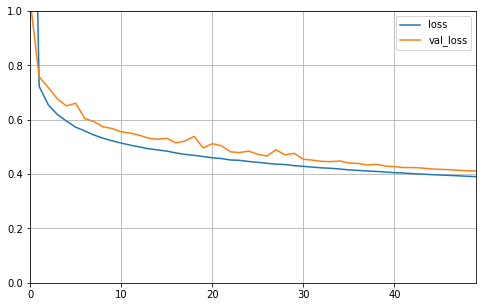

In [27]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [28]:
model.evaluate(x_test_scaled, y_test)

  32/5160 [..............................] - ETA: 1s - loss: 0.4596

1312/5160 [======>.......................] - ETA: 0s - loss: 0.4109

3008/5160 [================>.............] - ETA: 0s - loss: 0.4030

5160/5160 [==============================] - 0s 31us/sample - loss: 0.4103


0.4103230421857316

In [41]:
# 多输入与多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2])
        

model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_34 (Dense)                (None, 30)           210         input_17[0][0]                   
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 30)           930         dense_34[0][0]                   
___________________________________________________________________________________________

In [44]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        [y_valid, y_valid]),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples


Epoch 1/100
   32/11610 [..............................] - ETA: 56s - loss: 12.3395 - dense_36_loss: 5.1588 - dense_37_loss: 7.1807

  864/11610 [=>............................] - ETA: 2s - loss: 10.3449 - dense_36_loss: 5.0285 - dense_37_loss: 5.3164 

 1728/11610 [===>..........................] - ETA: 1s - loss: 9.2675 - dense_36_loss: 4.5252 - dense_37_loss: 4.7424 

 2656/11610 [=====>........................] - ETA: 1s - loss: 8.4215 - dense_36_loss: 4.1250 - dense_37_loss: 4.2966

 3584/11610 [========>.....................] - ETA: 0s - loss: 7.6065 - dense_36_loss: 3.7346 - dense_37_loss: 3.8719

 4448/11610 [==========>...................] - ETA: 0s - loss: 6.9891 - dense_36_loss: 3.4444 - dense_37_loss: 3.5447

 5344/11610 [============>.................] - ETA: 0s - loss: 6.4439 - dense_36_loss: 3.1764 - dense_37_loss: 3.2675

 6176/11610 [==============>...............] - ETA: 0s - loss: 6.3304 - dense_36_loss: 3.0976 - dense_37_loss: 3.2329

 7328/11610 [=================>............] - ETA: 0s - loss: 5.8153 - dense_36_loss: 2.8428 - dense_37_loss: 2.9724

 8448/11610 [====================>.........] - ETA: 0s - loss: 5.4250 - dense_36_loss: 2.6508 - dense_37_loss: 2.7742

 9664/11610 [=======================>......] - ETA: 0s - loss: 5.0500 - dense_36_loss: 2.4610 - dense_37_loss: 2.5891

10720/11610 [==========================>...] - ETA: 0s - loss: 4.7779 - dense_36_loss: 2.3214 - dense_37_loss: 2.4566

11610/11610 [==============================] - 1s 98us/sample - loss: 4.5870 - dense_36_loss: 2.2217 - dense_37_loss: 2.3653 - val_loss: 2.4137 - val_dense_36_loss: 1.0684 - val_dense_37_loss: 1.3453


Epoch 2/100
   32/11610 [..............................] - ETA: 1s - loss: 2.3593 - dense_36_loss: 0.9392 - dense_37_loss: 1.4201

 1056/11610 [=>............................] - ETA: 0s - loss: 2.4610 - dense_36_loss: 1.0756 - dense_37_loss: 1.3854

 2208/11610 [====>.........................] - ETA: 0s - loss: 2.2991 - dense_36_loss: 1.0004 - dense_37_loss: 1.2987

 3360/11610 [=======>......................] - ETA: 0s - loss: 2.2364 - dense_36_loss: 0.9666 - dense_37_loss: 1.2698

 4512/11610 [==========>...................] - ETA: 0s - loss: 2.2198 - dense_36_loss: 0.9486 - dense_37_loss: 1.2711

 5728/11610 [=============>................] - ETA: 0s - loss: 2.2474 - dense_36_loss: 0.9466 - dense_37_loss: 1.3008

 6880/11610 [================>.............] - ETA: 0s - loss: 2.1812 - dense_36_loss: 0.9108 - dense_37_loss: 1.2703

 8032/11610 [===================>..........] - ETA: 0s - loss: 2.1265 - dense_36_loss: 0.8801 - dense_37_loss: 1.2464

 8960/11610 [======================>.......] - ETA: 0s - loss: 2.1087 - dense_36_loss: 0.8704 - dense_37_loss: 1.2382

10048/11610 [========================>.....] - ETA: 0s - loss: 2.0634 - dense_36_loss: 0.8460 - dense_37_loss: 1.2174

11232/11610 [============================>.] - ETA: 0s - loss: 2.0334 - dense_36_loss: 0.8271 - dense_37_loss: 1.2062



11610/11610 [==============================] - 1s 56us/sample - loss: 2.0299 - dense_36_loss: 0.8259 - dense_37_loss: 1.2041 - val_loss: 1.9465 - val_dense_36_loss: 0.7495 - val_dense_37_loss: 1.1970


Epoch 3/100
   32/11610 [..............................] - ETA: 1s - loss: 1.5590 - dense_36_loss: 0.5657 - dense_37_loss: 0.9934



 1056/11610 [=>............................] - ETA: 0s - loss: 1.8133 - dense_36_loss: 0.6851 - dense_37_loss: 1.1283

 1888/11610 [===>..........................] - ETA: 0s - loss: 1.7397 - dense_36_loss: 0.6700 - dense_37_loss: 1.0696

 3072/11610 [======>.......................] - ETA: 0s - loss: 1.7702 - dense_36_loss: 0.6668 - dense_37_loss: 1.1034

 4256/11610 [=========>....................] - ETA: 0s - loss: 1.7439 - dense_36_loss: 0.6627 - dense_37_loss: 1.0813

 5440/11610 [=============>................] - ETA: 0s - loss: 1.7481 - dense_36_loss: 0.6668 - dense_37_loss: 1.0813

 6560/11610 [===============>..............] - ETA: 0s - loss: 1.7446 - dense_36_loss: 0.6594 - dense_37_loss: 1.0853

 7648/11610 [==================>...........] - ETA: 0s - loss: 1.7568 - dense_36_loss: 0.6619 - dense_37_loss: 1.0949

 8672/11610 [=====================>........] - ETA: 0s - loss: 1.7515 - dense_36_loss: 0.6596 - dense_37_loss: 1.0919

 9792/11610 [========================>.....] - ETA: 0s - loss: 1.7232 - dense_36_loss: 0.6456 - dense_37_loss: 1.0777

10976/11610 [===========================>..] - ETA: 0s - loss: 1.7166 - dense_36_loss: 0.6446 - dense_37_loss: 1.0720



11610/11610 [==============================] - 1s 57us/sample - loss: 1.7258 - dense_36_loss: 0.6487 - dense_37_loss: 1.0771 - val_loss: 1.7565 - val_dense_36_loss: 0.6578 - val_dense_37_loss: 1.0986


Epoch 4/100
   32/11610 [..............................] - ETA: 1s - loss: 1.0429 - dense_36_loss: 0.4967 - dense_37_loss: 0.5462

 1056/11610 [=>............................] - ETA: 0s - loss: 1.6868 - dense_36_loss: 0.6387 - dense_37_loss: 1.0482

 2240/11610 [====>.........................] - ETA: 0s - loss: 1.6371 - dense_36_loss: 0.6248 - dense_37_loss: 1.0123

 3392/11610 [=======>......................] - ETA: 0s - loss: 1.6144 - dense_36_loss: 0.6083 - dense_37_loss: 1.0060

 4576/11610 [==========>...................] - ETA: 0s - loss: 1.6041 - dense_36_loss: 0.6110 - dense_37_loss: 0.9931

 5728/11610 [=============>................] - ETA: 0s - loss: 1.5798 - dense_36_loss: 0.5946 - dense_37_loss: 0.9852

 6912/11610 [================>.............] - ETA: 0s - loss: 1.5890 - dense_36_loss: 0.5992 - dense_37_loss: 0.9898

 7968/11610 [===================>..........] - ETA: 0s - loss: 1.5845 - dense_36_loss: 0.5939 - dense_37_loss: 0.9906



 9088/11610 [======================>.......] - ETA: 0s - loss: 1.5698 - dense_36_loss: 0.5865 - dense_37_loss: 0.9833

10176/11610 [=========================>....] - ETA: 0s - loss: 1.5835 - dense_36_loss: 0.5915 - dense_37_loss: 0.9920

11360/11610 [============================>.] - ETA: 0s - loss: 1.5731 - dense_36_loss: 0.5869 - dense_37_loss: 0.9862

11610/11610 [==============================] - 1s 55us/sample - loss: 1.5757 - dense_36_loss: 0.5885 - dense_37_loss: 0.9873 - val_loss: 1.6177 - val_dense_36_loss: 0.6080 - val_dense_37_loss: 1.0096


Epoch 5/100
   32/11610 [..............................] - ETA: 0s - loss: 1.9235 - dense_36_loss: 0.6433 - dense_37_loss: 1.2802



  992/11610 [=>............................] - ETA: 0s - loss: 1.6235 - dense_36_loss: 0.6161 - dense_37_loss: 1.0074

 2080/11610 [====>.........................] - ETA: 0s - loss: 1.5943 - dense_36_loss: 0.6067 - dense_37_loss: 0.9876

 3200/11610 [=======>......................] - ETA: 0s - loss: 1.4965 - dense_36_loss: 0.5592 - dense_37_loss: 0.9373

 4384/11610 [==========>...................] - ETA: 0s - loss: 1.4965 - dense_36_loss: 0.5641 - dense_37_loss: 0.9324

 5536/11610 [=============>................] - ETA: 0s - loss: 1.4840 - dense_36_loss: 0.5625 - dense_37_loss: 0.9215

 6720/11610 [================>.............] - ETA: 0s - loss: 1.4947 - dense_36_loss: 0.5634 - dense_37_loss: 0.9313



 7808/11610 [===================>..........] - ETA: 0s - loss: 1.4789 - dense_36_loss: 0.5554 - dense_37_loss: 0.9235

 8864/11610 [=====================>........] - ETA: 0s - loss: 1.4679 - dense_36_loss: 0.5561 - dense_37_loss: 0.9118

10016/11610 [========================>.....] - ETA: 0s - loss: 1.4567 - dense_36_loss: 0.5538 - dense_37_loss: 0.9030

10912/11610 [===========================>..] - ETA: 0s - loss: 1.4592 - dense_36_loss: 0.5545 - dense_37_loss: 0.9047



11610/11610 [==============================] - 1s 60us/sample - loss: 1.4578 - dense_36_loss: 0.5532 - dense_37_loss: 0.9046 - val_loss: 1.4990 - val_dense_36_loss: 0.5746 - val_dense_37_loss: 0.9244


Epoch 6/100
   32/11610 [..............................] - ETA: 0s - loss: 2.5615 - dense_36_loss: 0.9119 - dense_37_loss: 1.6496

 1120/11610 [=>............................] - ETA: 0s - loss: 1.3770 - dense_36_loss: 0.5123 - dense_37_loss: 0.8648

 2304/11610 [====>.........................] - ETA: 0s - loss: 1.3674 - dense_36_loss: 0.5087 - dense_37_loss: 0.8587

 3520/11610 [========>.....................] - ETA: 0s - loss: 1.4142 - dense_36_loss: 0.5431 - dense_37_loss: 0.8710

 4448/11610 [==========>...................] - ETA: 0s - loss: 1.3767 - dense_36_loss: 0.5303 - dense_37_loss: 0.8464

 5600/11610 [=============>................] - ETA: 0s - loss: 1.3914 - dense_36_loss: 0.5395 - dense_37_loss: 0.8519

 6656/11610 [================>.............] - ETA: 0s - loss: 1.3866 - dense_36_loss: 0.5380 - dense_37_loss: 0.8486

 7680/11610 [==================>...........] - ETA: 0s - loss: 1.3692 - dense_36_loss: 0.5334 - dense_37_loss: 0.8357

 8832/11610 [=====================>........] - ETA: 0s - loss: 1.3597 - dense_36_loss: 0.5275 - dense_37_loss: 0.8322

 9984/11610 [========================>.....] - ETA: 0s - loss: 1.3638 - dense_36_loss: 0.5287 - dense_37_loss: 0.8352

11168/11610 [===========================>..] - ETA: 0s - loss: 1.3607 - dense_36_loss: 0.5270 - dense_37_loss: 0.8338



11610/11610 [==============================] - 1s 57us/sample - loss: 1.3604 - dense_36_loss: 0.5275 - dense_37_loss: 0.8329 - val_loss: 1.4198 - val_dense_36_loss: 0.5554 - val_dense_37_loss: 0.8644


Epoch 7/100
   32/11610 [..............................] - ETA: 1s - loss: 1.1752 - dense_36_loss: 0.3884 - dense_37_loss: 0.7868

 1152/11610 [=>............................] - ETA: 0s - loss: 1.2525 - dense_36_loss: 0.4991 - dense_37_loss: 0.7534

 2368/11610 [=====>........................] - ETA: 0s - loss: 1.3167 - dense_36_loss: 0.5174 - dense_37_loss: 0.7993

 3520/11610 [========>.....................] - ETA: 0s - loss: 1.3147 - dense_36_loss: 0.5241 - dense_37_loss: 0.7906

 4704/11610 [===========>..................] - ETA: 0s - loss: 1.3103 - dense_36_loss: 0.5203 - dense_37_loss: 0.7900

 5888/11610 [==============>...............] - ETA: 0s - loss: 1.2762 - dense_36_loss: 0.5039 - dense_37_loss: 0.7723

 6880/11610 [================>.............] - ETA: 0s - loss: 1.2726 - dense_36_loss: 0.4997 - dense_37_loss: 0.7730

 7936/11610 [===================>..........] - ETA: 0s - loss: 1.2831 - dense_36_loss: 0.5054 - dense_37_loss: 0.7777

 9024/11610 [======================>.......] - ETA: 0s - loss: 1.2743 - dense_36_loss: 0.5027 - dense_37_loss: 0.7715

10112/11610 [=========================>....] - ETA: 0s - loss: 1.2769 - dense_36_loss: 0.5044 - dense_37_loss: 0.7724

11296/11610 [============================>.] - ETA: 0s - loss: 1.2835 - dense_36_loss: 0.5083 - dense_37_loss: 0.7752



11610/11610 [==============================] - 1s 56us/sample - loss: 1.2822 - dense_36_loss: 0.5087 - dense_37_loss: 0.7735 - val_loss: 1.3268 - val_dense_36_loss: 0.5308 - val_dense_37_loss: 0.7960


Epoch 8/100
   32/11610 [..............................] - ETA: 1s - loss: 1.2978 - dense_36_loss: 0.3615 - dense_37_loss: 0.9363



 1088/11610 [=>............................] - ETA: 0s - loss: 1.3986 - dense_36_loss: 0.5635 - dense_37_loss: 0.8352

 2208/11610 [====>.........................] - ETA: 0s - loss: 1.3250 - dense_36_loss: 0.5333 - dense_37_loss: 0.7917

 3360/11610 [=======>......................] - ETA: 0s - loss: 1.2656 - dense_36_loss: 0.5073 - dense_37_loss: 0.7584

 4544/11610 [==========>...................] - ETA: 0s - loss: 1.2285 - dense_36_loss: 0.4911 - dense_37_loss: 0.7374

 5728/11610 [=============>................] - ETA: 0s - loss: 1.1988 - dense_36_loss: 0.4814 - dense_37_loss: 0.7174

 6816/11610 [================>.............] - ETA: 0s - loss: 1.2004 - dense_36_loss: 0.4786 - dense_37_loss: 0.7217

 7936/11610 [===================>..........] - ETA: 0s - loss: 1.2197 - dense_36_loss: 0.4886 - dense_37_loss: 0.7311

 9056/11610 [======================>.......] - ETA: 0s - loss: 1.2214 - dense_36_loss: 0.4911 - dense_37_loss: 0.7303

10208/11610 [=========================>....] - ETA: 0s - loss: 1.2215 - dense_36_loss: 0.4902 - dense_37_loss: 0.7313

11200/11610 [===========================>..] - ETA: 0s - loss: 1.2301 - dense_36_loss: 0.4960 - dense_37_loss: 0.7341

11610/11610 [==============================] - 1s 57us/sample - loss: 1.2266 - dense_36_loss: 0.4953 - dense_37_loss: 0.7313 - val_loss: 1.2764 - val_dense_36_loss: 0.5179 - val_dense_37_loss: 0.7585


Epoch 9/100
   32/11610 [..............................] - ETA: 1s - loss: 0.7841 - dense_36_loss: 0.2950 - dense_37_loss: 0.4891

  800/11610 [=>............................] - ETA: 0s - loss: 1.2150 - dense_36_loss: 0.4780 - dense_37_loss: 0.7370

 1792/11610 [===>..........................] - ETA: 0s - loss: 1.2490 - dense_36_loss: 0.4945 - dense_37_loss: 0.7546

 2912/11610 [======>.......................] - ETA: 0s - loss: 1.2030 - dense_36_loss: 0.4851 - dense_37_loss: 0.7179

 3936/11610 [=========>....................] - ETA: 0s - loss: 1.1850 - dense_36_loss: 0.4859 - dense_37_loss: 0.6991

 5024/11610 [===========>..................] - ETA: 0s - loss: 1.1655 - dense_36_loss: 0.4763 - dense_37_loss: 0.6892

 6112/11610 [==============>...............] - ETA: 0s - loss: 1.1855 - dense_36_loss: 0.4890 - dense_37_loss: 0.6965

 7200/11610 [=================>............] - ETA: 0s - loss: 1.1918 - dense_36_loss: 0.4893 - dense_37_loss: 0.7025

 8288/11610 [====================>.........] - ETA: 0s - loss: 1.1944 - dense_36_loss: 0.4907 - dense_37_loss: 0.7037

 9376/11610 [=======================>......] - ETA: 0s - loss: 1.1957 - dense_36_loss: 0.4889 - dense_37_loss: 0.7068

10496/11610 [==========================>...] - ETA: 0s - loss: 1.1849 - dense_36_loss: 0.4830 - dense_37_loss: 0.7019

11610/11610 [==============================] - 1s 59us/sample - loss: 1.1844 - dense_36_loss: 0.4834 - dense_37_loss: 0.7010 - val_loss: 1.2321 - val_dense_36_loss: 0.5052 - val_dense_37_loss: 0.7269


Epoch 10/100


   32/11610 [..............................] - ETA: 1s - loss: 1.4184 - dense_36_loss: 0.5603 - dense_37_loss: 0.8581

  768/11610 [>.............................] - ETA: 0s - loss: 1.2150 - dense_36_loss: 0.4946 - dense_37_loss: 0.7204

 1856/11610 [===>..........................] - ETA: 0s - loss: 1.2065 - dense_36_loss: 0.5029 - dense_37_loss: 0.7036

 2912/11610 [======>.......................] - ETA: 0s - loss: 1.1387 - dense_36_loss: 0.4709 - dense_37_loss: 0.6678



 4000/11610 [=========>....................] - ETA: 0s - loss: 1.1140 - dense_36_loss: 0.4570 - dense_37_loss: 0.6569

 5024/11610 [===========>..................] - ETA: 0s - loss: 1.0992 - dense_36_loss: 0.4518 - dense_37_loss: 0.6474

 6176/11610 [==============>...............] - ETA: 0s - loss: 1.1157 - dense_36_loss: 0.4582 - dense_37_loss: 0.6575

 7328/11610 [=================>............] - ETA: 0s - loss: 1.1404 - dense_36_loss: 0.4695 - dense_37_loss: 0.6709

 8480/11610 [====================>.........] - ETA: 0s - loss: 1.1514 - dense_36_loss: 0.4721 - dense_37_loss: 0.6793

 9536/11610 [=======================>......] - ETA: 0s - loss: 1.1513 - dense_36_loss: 0.4733 - dense_37_loss: 0.6780

10688/11610 [==========================>...] - ETA: 0s - loss: 1.1559 - dense_36_loss: 0.4754 - dense_37_loss: 0.6805

11610/11610 [==============================] - 1s 57us/sample - loss: 1.1547 - dense_36_loss: 0.4762 - dense_37_loss: 0.6784 - val_loss: 1.2041 - val_dense_36_loss: 0.4980 - val_dense_37_loss: 0.7062


Epoch 11/100
   32/11610 [..............................] - ETA: 0s - loss: 1.0489 - dense_36_loss: 0.2975 - dense_37_loss: 0.7514

 1024/11610 [=>............................] - ETA: 0s - loss: 1.2352 - dense_36_loss: 0.4990 - dense_37_loss: 0.7361

 2144/11610 [====>.........................] - ETA: 0s - loss: 1.1548 - dense_36_loss: 0.4628 - dense_37_loss: 0.6920

 3328/11610 [=======>......................] - ETA: 0s - loss: 1.1528 - dense_36_loss: 0.4635 - dense_37_loss: 0.6893

 4512/11610 [==========>...................] - ETA: 0s - loss: 1.1136 - dense_36_loss: 0.4492 - dense_37_loss: 0.6644

 5632/11610 [=============>................] - ETA: 0s - loss: 1.1344 - dense_36_loss: 0.4613 - dense_37_loss: 0.6731

 6752/11610 [================>.............] - ETA: 0s - loss: 1.1524 - dense_36_loss: 0.4706 - dense_37_loss: 0.6819

 7904/11610 [===================>..........] - ETA: 0s - loss: 1.1398 - dense_36_loss: 0.4663 - dense_37_loss: 0.6735



 9088/11610 [======================>.......] - ETA: 0s - loss: 1.1412 - dense_36_loss: 0.4718 - dense_37_loss: 0.6693

10176/11610 [=========================>....] - ETA: 0s - loss: 1.1396 - dense_36_loss: 0.4728 - dense_37_loss: 0.6668

11264/11610 [============================>.] - ETA: 0s - loss: 1.1340 - dense_36_loss: 0.4706 - dense_37_loss: 0.6634



11610/11610 [==============================] - 1s 56us/sample - loss: 1.1319 - dense_36_loss: 0.4701 - dense_37_loss: 0.6618 - val_loss: 1.1886 - val_dense_36_loss: 0.4949 - val_dense_37_loss: 0.6936


Epoch 12/100
   32/11610 [..............................] - ETA: 1s - loss: 1.4189 - dense_36_loss: 0.6126 - dense_37_loss: 0.8063

 1088/11610 [=>............................] - ETA: 0s - loss: 1.1750 - dense_36_loss: 0.4955 - dense_37_loss: 0.6795

 2208/11610 [====>.........................] - ETA: 0s - loss: 1.1777 - dense_36_loss: 0.4936 - dense_37_loss: 0.6841

 3360/11610 [=======>......................] - ETA: 0s - loss: 1.1571 - dense_36_loss: 0.4827 - dense_37_loss: 0.6745

 4512/11610 [==========>...................] - ETA: 0s - loss: 1.1396 - dense_36_loss: 0.4791 - dense_37_loss: 0.6605

 5664/11610 [=============>................] - ETA: 0s - loss: 1.1188 - dense_36_loss: 0.4729 - dense_37_loss: 0.6458

 6720/11610 [================>.............] - ETA: 0s - loss: 1.1091 - dense_36_loss: 0.4675 - dense_37_loss: 0.6416

 7680/11610 [==================>...........] - ETA: 0s - loss: 1.1253 - dense_36_loss: 0.4746 - dense_37_loss: 0.6507



 8800/11610 [=====================>........] - ETA: 0s - loss: 1.1185 - dense_36_loss: 0.4674 - dense_37_loss: 0.6512

 9856/11610 [========================>.....] - ETA: 0s - loss: 1.1182 - dense_36_loss: 0.4665 - dense_37_loss: 0.6517

10976/11610 [===========================>..] - ETA: 0s - loss: 1.1175 - dense_36_loss: 0.4661 - dense_37_loss: 0.6514

11610/11610 [==============================] - 1s 58us/sample - loss: 1.1113 - dense_36_loss: 0.4635 - dense_37_loss: 0.6477 - val_loss: 1.1575 - val_dense_36_loss: 0.4831 - val_dense_37_loss: 0.6744


Epoch 13/100
   32/11610 [..............................] - ETA: 1s - loss: 1.3233 - dense_36_loss: 0.5556 - dense_37_loss: 0.7678

 1120/11610 [=>............................] - ETA: 0s - loss: 1.1691 - dense_36_loss: 0.5241 - dense_37_loss: 0.6451

 2240/11610 [====>.........................] - ETA: 0s - loss: 1.1907 - dense_36_loss: 0.5224 - dense_37_loss: 0.6683

 3360/11610 [=======>......................] - ETA: 0s - loss: 1.1528 - dense_36_loss: 0.5002 - dense_37_loss: 0.6525

 4352/11610 [==========>...................] - ETA: 0s - loss: 1.1456 - dense_36_loss: 0.4912 - dense_37_loss: 0.6545

 5440/11610 [=============>................] - ETA: 0s - loss: 1.1286 - dense_36_loss: 0.4796 - dense_37_loss: 0.6490

 6560/11610 [===============>..............] - ETA: 0s - loss: 1.1099 - dense_36_loss: 0.4686 - dense_37_loss: 0.6413

 7648/11610 [==================>...........] - ETA: 0s - loss: 1.0920 - dense_36_loss: 0.4590 - dense_37_loss: 0.6330



 8768/11610 [=====================>........] - ETA: 0s - loss: 1.0876 - dense_36_loss: 0.4573 - dense_37_loss: 0.6303

 9792/11610 [========================>.....] - ETA: 0s - loss: 1.1035 - dense_36_loss: 0.4637 - dense_37_loss: 0.6398

10784/11610 [==========================>...] - ETA: 0s - loss: 1.0985 - dense_36_loss: 0.4619 - dense_37_loss: 0.6366

11610/11610 [==============================] - 1s 58us/sample - loss: 1.0955 - dense_36_loss: 0.4602 - dense_37_loss: 0.6353 - val_loss: 1.1366 - val_dense_36_loss: 0.4784 - val_dense_37_loss: 0.6582


Epoch 14/100
   32/11610 [..............................] - ETA: 1s - loss: 1.1371 - dense_36_loss: 0.3787 - dense_37_loss: 0.7584

 1088/11610 [=>............................] - ETA: 0s - loss: 1.0940 - dense_36_loss: 0.4659 - dense_37_loss: 0.6281

 2208/11610 [====>.........................] - ETA: 0s - loss: 1.0543 - dense_36_loss: 0.4508 - dense_37_loss: 0.6035

 3328/11610 [=======>......................] - ETA: 0s - loss: 1.1017 - dense_36_loss: 0.4682 - dense_37_loss: 0.6334

 4448/11610 [==========>...................] - ETA: 0s - loss: 1.0968 - dense_36_loss: 0.4629 - dense_37_loss: 0.6340

 5344/11610 [============>.................] - ETA: 0s - loss: 1.0852 - dense_36_loss: 0.4586 - dense_37_loss: 0.6266

 6464/11610 [===============>..............] - ETA: 0s - loss: 1.0966 - dense_36_loss: 0.4614 - dense_37_loss: 0.6353

 7584/11610 [==================>...........] - ETA: 0s - loss: 1.0875 - dense_36_loss: 0.4576 - dense_37_loss: 0.6299

 8672/11610 [=====================>........] - ETA: 0s - loss: 1.0732 - dense_36_loss: 0.4525 - dense_37_loss: 0.6207



 9760/11610 [========================>.....] - ETA: 0s - loss: 1.0764 - dense_36_loss: 0.4556 - dense_37_loss: 0.6208

10496/11610 [==========================>...] - ETA: 0s - loss: 1.0825 - dense_36_loss: 0.4574 - dense_37_loss: 0.6251

11264/11610 [============================>.] - ETA: 0s - loss: 1.0792 - dense_36_loss: 0.4551 - dense_37_loss: 0.6241

11610/11610 [==============================] - 1s 62us/sample - loss: 1.0806 - dense_36_loss: 0.4549 - dense_37_loss: 0.6257 - val_loss: 1.1252 - val_dense_36_loss: 0.4738 - val_dense_37_loss: 0.6514


Epoch 15/100
   32/11610 [..............................] - ETA: 1s - loss: 1.2435 - dense_36_loss: 0.5719 - dense_37_loss: 0.6716

  864/11610 [=>............................] - ETA: 0s - loss: 1.0753 - dense_36_loss: 0.4386 - dense_37_loss: 0.6367

 1920/11610 [===>..........................] - ETA: 0s - loss: 1.0530 - dense_36_loss: 0.4458 - dense_37_loss: 0.6072

 3072/11610 [======>.......................] - ETA: 0s - loss: 1.0755 - dense_36_loss: 0.4650 - dense_37_loss: 0.6105

 4224/11610 [=========>....................] - ETA: 0s - loss: 1.0603 - dense_36_loss: 0.4517 - dense_37_loss: 0.6086

 5344/11610 [============>.................] - ETA: 0s - loss: 1.0558 - dense_36_loss: 0.4486 - dense_37_loss: 0.6072

 6464/11610 [===============>..............] - ETA: 0s - loss: 1.0621 - dense_36_loss: 0.4518 - dense_37_loss: 0.6103

 7616/11610 [==================>...........] - ETA: 0s - loss: 1.0616 - dense_36_loss: 0.4491 - dense_37_loss: 0.6125



 8736/11610 [=====================>........] - ETA: 0s - loss: 1.0748 - dense_36_loss: 0.4544 - dense_37_loss: 0.6203

 9856/11610 [========================>.....] - ETA: 0s - loss: 1.0762 - dense_36_loss: 0.4559 - dense_37_loss: 0.6203

11008/11610 [===========================>..] - ETA: 0s - loss: 1.0725 - dense_36_loss: 0.4536 - dense_37_loss: 0.6189



11610/11610 [==============================] - 1s 57us/sample - loss: 1.0667 - dense_36_loss: 0.4513 - dense_37_loss: 0.6155 - val_loss: 1.1133 - val_dense_36_loss: 0.4685 - val_dense_37_loss: 0.6448


Epoch 16/100
   32/11610 [..............................] - ETA: 1s - loss: 1.5279 - dense_36_loss: 0.7020 - dense_37_loss: 0.8260

 1152/11610 [=>............................] - ETA: 0s - loss: 1.0199 - dense_36_loss: 0.4272 - dense_37_loss: 0.5927

 2240/11610 [====>.........................] - ETA: 0s - loss: 1.0101 - dense_36_loss: 0.4271 - dense_37_loss: 0.5829

 3360/11610 [=======>......................] - ETA: 0s - loss: 1.0013 - dense_36_loss: 0.4256 - dense_37_loss: 0.5757

 4512/11610 [==========>...................] - ETA: 0s - loss: 0.9863 - dense_36_loss: 0.4136 - dense_37_loss: 0.5727



 5696/11610 [=============>................] - ETA: 0s - loss: 1.0008 - dense_36_loss: 0.4182 - dense_37_loss: 0.5826

 6784/11610 [================>.............] - ETA: 0s - loss: 1.0107 - dense_36_loss: 0.4242 - dense_37_loss: 0.5864

 7936/11610 [===================>..........] - ETA: 0s - loss: 1.0221 - dense_36_loss: 0.4306 - dense_37_loss: 0.5915

 9120/11610 [======================>.......] - ETA: 0s - loss: 1.0261 - dense_36_loss: 0.4311 - dense_37_loss: 0.5951



10304/11610 [=========================>....] - ETA: 0s - loss: 1.0334 - dense_36_loss: 0.4353 - dense_37_loss: 0.5981

11392/11610 [============================>.] - ETA: 0s - loss: 1.0508 - dense_36_loss: 0.4451 - dense_37_loss: 0.6057



11610/11610 [==============================] - 1s 56us/sample - loss: 1.0543 - dense_36_loss: 0.4471 - dense_37_loss: 0.6072 - val_loss: 1.1073 - val_dense_36_loss: 0.4702 - val_dense_37_loss: 0.6372


Epoch 17/100
   32/11610 [..............................] - ETA: 1s - loss: 1.1784 - dense_36_loss: 0.4834 - dense_37_loss: 0.6951



 1056/11610 [=>............................] - ETA: 0s - loss: 1.1009 - dense_36_loss: 0.4817 - dense_37_loss: 0.6192

 2176/11610 [====>.........................] - ETA: 0s - loss: 1.0540 - dense_36_loss: 0.4577 - dense_37_loss: 0.5963

 3168/11610 [=======>......................] - ETA: 0s - loss: 1.0450 - dense_36_loss: 0.4466 - dense_37_loss: 0.5984

 4288/11610 [==========>...................] - ETA: 0s - loss: 1.0278 - dense_36_loss: 0.4363 - dense_37_loss: 0.5915

 5472/11610 [=============>................] - ETA: 0s - loss: 1.0331 - dense_36_loss: 0.4385 - dense_37_loss: 0.5947



 6656/11610 [================>.............] - ETA: 0s - loss: 1.0218 - dense_36_loss: 0.4355 - dense_37_loss: 0.5863

 7776/11610 [===================>..........] - ETA: 0s - loss: 1.0416 - dense_36_loss: 0.4454 - dense_37_loss: 0.5962

 8960/11610 [======================>.......] - ETA: 0s - loss: 1.0281 - dense_36_loss: 0.4391 - dense_37_loss: 0.5890

10080/11610 [=========================>....] - ETA: 0s - loss: 1.0239 - dense_36_loss: 0.4362 - dense_37_loss: 0.5876

11264/11610 [============================>.] - ETA: 0s - loss: 1.0395 - dense_36_loss: 0.4420 - dense_37_loss: 0.5975

11610/11610 [==============================] - 1s 59us/sample - loss: 1.0431 - dense_36_loss: 0.4433 - dense_37_loss: 0.5998 - val_loss: 1.0949 - val_dense_36_loss: 0.4616 - val_dense_37_loss: 0.6333


Epoch 18/100
   32/11610 [..............................] - ETA: 1s - loss: 1.3163 - dense_36_loss: 0.5454 - dense_37_loss: 0.7708

 1152/11610 [=>............................] - ETA: 0s - loss: 0.9511 - dense_36_loss: 0.3980 - dense_37_loss: 0.5532

 2272/11610 [====>.........................] - ETA: 0s - loss: 0.9524 - dense_36_loss: 0.3965 - dense_37_loss: 0.5559

 3456/11610 [=======>......................] - ETA: 0s - loss: 0.9945 - dense_36_loss: 0.4150 - dense_37_loss: 0.5794

 4640/11610 [==========>...................] - ETA: 0s - loss: 1.0310 - dense_36_loss: 0.4397 - dense_37_loss: 0.5912

 5792/11610 [=============>................] - ETA: 0s - loss: 1.0332 - dense_36_loss: 0.4404 - dense_37_loss: 0.5928

 6720/11610 [================>.............] - ETA: 0s - loss: 1.0403 - dense_36_loss: 0.4428 - dense_37_loss: 0.5976



 7904/11610 [===================>..........] - ETA: 0s - loss: 1.0394 - dense_36_loss: 0.4419 - dense_37_loss: 0.5975

 8960/11610 [======================>.......] - ETA: 0s - loss: 1.0357 - dense_36_loss: 0.4417 - dense_37_loss: 0.5940

10112/11610 [=========================>....] - ETA: 0s - loss: 1.0320 - dense_36_loss: 0.4384 - dense_37_loss: 0.5936

11264/11610 [============================>.] - ETA: 0s - loss: 1.0338 - dense_36_loss: 0.4406 - dense_37_loss: 0.5932



11610/11610 [==============================] - 1s 56us/sample - loss: 1.0330 - dense_36_loss: 0.4399 - dense_37_loss: 0.5932 - val_loss: 1.0776 - val_dense_36_loss: 0.4568 - val_dense_37_loss: 0.6209


Epoch 19/100
   32/11610 [..............................] - ETA: 1s - loss: 1.1739 - dense_36_loss: 0.5487 - dense_37_loss: 0.6252

 1152/11610 [=>............................] - ETA: 0s - loss: 0.9488 - dense_36_loss: 0.3968 - dense_37_loss: 0.5520

 2272/11610 [====>.........................] - ETA: 0s - loss: 0.9653 - dense_36_loss: 0.4154 - dense_37_loss: 0.5499

 3392/11610 [=======>......................] - ETA: 0s - loss: 0.9529 - dense_36_loss: 0.4073 - dense_37_loss: 0.5456

 4544/11610 [==========>...................] - ETA: 0s - loss: 0.9858 - dense_36_loss: 0.4239 - dense_37_loss: 0.5620

 5696/11610 [=============>................] - ETA: 0s - loss: 0.9958 - dense_36_loss: 0.4264 - dense_37_loss: 0.5694

 6880/11610 [================>.............] - ETA: 0s - loss: 1.0286 - dense_36_loss: 0.4395 - dense_37_loss: 0.5891

 8064/11610 [===================>..........] - ETA: 0s - loss: 1.0248 - dense_36_loss: 0.4389 - dense_37_loss: 0.5859

 9216/11610 [======================>.......] - ETA: 0s - loss: 1.0294 - dense_36_loss: 0.4402 - dense_37_loss: 0.5892

10368/11610 [=========================>....] - ETA: 0s - loss: 1.0325 - dense_36_loss: 0.4415 - dense_37_loss: 0.5910

11520/11610 [============================>.] - ETA: 0s - loss: 1.0246 - dense_36_loss: 0.4367 - dense_37_loss: 0.5879



11610/11610 [==============================] - 1s 55us/sample - loss: 1.0242 - dense_36_loss: 0.4370 - dense_37_loss: 0.5871 - val_loss: 1.0680 - val_dense_36_loss: 0.4539 - val_dense_37_loss: 0.6141


Epoch 20/100
   32/11610 [..............................] - ETA: 1s - loss: 1.4686 - dense_36_loss: 0.5769 - dense_37_loss: 0.8917



 1056/11610 [=>............................] - ETA: 0s - loss: 0.9991 - dense_36_loss: 0.4384 - dense_37_loss: 0.5607

 2112/11610 [====>.........................] - ETA: 0s - loss: 1.0080 - dense_36_loss: 0.4349 - dense_37_loss: 0.5730

 3232/11610 [=======>......................] - ETA: 0s - loss: 1.0326 - dense_36_loss: 0.4387 - dense_37_loss: 0.5939

 4384/11610 [==========>...................] - ETA: 0s - loss: 1.0367 - dense_36_loss: 0.4420 - dense_37_loss: 0.5947

 5536/11610 [=============>................] - ETA: 0s - loss: 1.0276 - dense_36_loss: 0.4393 - dense_37_loss: 0.5883



 6656/11610 [================>.............] - ETA: 0s - loss: 1.0431 - dense_36_loss: 0.4442 - dense_37_loss: 0.5989

 7744/11610 [===================>..........] - ETA: 0s - loss: 1.0310 - dense_36_loss: 0.4396 - dense_37_loss: 0.5914

 8928/11610 [======================>.......] - ETA: 0s - loss: 1.0297 - dense_36_loss: 0.4391 - dense_37_loss: 0.5905

10016/11610 [========================>.....] - ETA: 0s - loss: 1.0261 - dense_36_loss: 0.4392 - dense_37_loss: 0.5869



11168/11610 [===========================>..] - ETA: 0s - loss: 1.0141 - dense_36_loss: 0.4344 - dense_37_loss: 0.5797

11610/11610 [==============================] - 1s 60us/sample - loss: 1.0154 - dense_36_loss: 0.4352 - dense_37_loss: 0.5802 - val_loss: 1.0785 - val_dense_36_loss: 0.4664 - val_dense_37_loss: 0.6121


Epoch 21/100


   32/11610 [..............................] - ETA: 1s - loss: 0.6880 - dense_36_loss: 0.2243 - dense_37_loss: 0.4636

 1120/11610 [=>............................] - ETA: 0s - loss: 1.1039 - dense_36_loss: 0.4893 - dense_37_loss: 0.6146

 2208/11610 [====>.........................] - ETA: 0s - loss: 1.0613 - dense_36_loss: 0.4703 - dense_37_loss: 0.5910

 3072/11610 [======>.......................] - ETA: 0s - loss: 1.0283 - dense_36_loss: 0.4532 - dense_37_loss: 0.5750



 4224/11610 [=========>....................] - ETA: 0s - loss: 1.0386 - dense_36_loss: 0.4539 - dense_37_loss: 0.5847

 5312/11610 [============>.................] - ETA: 0s - loss: 1.0418 - dense_36_loss: 0.4518 - dense_37_loss: 0.5900

 6464/11610 [===============>..............] - ETA: 0s - loss: 1.0465 - dense_36_loss: 0.4549 - dense_37_loss: 0.5915



 7680/11610 [==================>...........] - ETA: 0s - loss: 1.0300 - dense_36_loss: 0.4470 - dense_37_loss: 0.5830

 8768/11610 [=====================>........] - ETA: 0s - loss: 1.0275 - dense_36_loss: 0.4441 - dense_37_loss: 0.5834

 9888/11610 [========================>.....] - ETA: 0s - loss: 1.0179 - dense_36_loss: 0.4395 - dense_37_loss: 0.5784

11040/11610 [===========================>..] - ETA: 0s - loss: 1.0131 - dense_36_loss: 0.4357 - dense_37_loss: 0.5774



11610/11610 [==============================] - 1s 57us/sample - loss: 1.0074 - dense_36_loss: 0.4323 - dense_37_loss: 0.5751 - val_loss: 1.0616 - val_dense_36_loss: 0.4562 - val_dense_37_loss: 0.6054


Epoch 22/100
   32/11610 [..............................] - ETA: 1s - loss: 1.4731 - dense_36_loss: 0.6489 - dense_37_loss: 0.8241

 1120/11610 [=>............................] - ETA: 0s - loss: 1.0289 - dense_36_loss: 0.4427 - dense_37_loss: 0.5862

 2240/11610 [====>.........................] - ETA: 0s - loss: 0.9855 - dense_36_loss: 0.4191 - dense_37_loss: 0.5665

 3424/11610 [=======>......................] - ETA: 0s - loss: 1.0024 - dense_36_loss: 0.4286 - dense_37_loss: 0.5738

 4576/11610 [==========>...................] - ETA: 0s - loss: 1.0157 - dense_36_loss: 0.4349 - dense_37_loss: 0.5808

 5696/11610 [=============>................] - ETA: 0s - loss: 1.0292 - dense_36_loss: 0.4431 - dense_37_loss: 0.5861

 6880/11610 [================>.............] - ETA: 0s - loss: 1.0212 - dense_36_loss: 0.4381 - dense_37_loss: 0.5831

 7872/11610 [===================>..........] - ETA: 0s - loss: 1.0154 - dense_36_loss: 0.4365 - dense_37_loss: 0.5789



 8960/11610 [======================>.......] - ETA: 0s - loss: 1.0116 - dense_36_loss: 0.4345 - dense_37_loss: 0.5770

10048/11610 [========================>.....] - ETA: 0s - loss: 1.0117 - dense_36_loss: 0.4347 - dense_37_loss: 0.5770

11232/11610 [============================>.] - ETA: 0s - loss: 0.9993 - dense_36_loss: 0.4286 - dense_37_loss: 0.5707



11610/11610 [==============================] - 1s 56us/sample - loss: 0.9988 - dense_36_loss: 0.4290 - dense_37_loss: 0.5698 - val_loss: 1.0607 - val_dense_36_loss: 0.4512 - val_dense_37_loss: 0.6095


Epoch 23/100
   32/11610 [..............................] - ETA: 1s - loss: 1.6029 - dense_36_loss: 0.6855 - dense_37_loss: 0.9174

 1152/11610 [=>............................] - ETA: 0s - loss: 1.0185 - dense_36_loss: 0.4443 - dense_37_loss: 0.5741

 2240/11610 [====>.........................] - ETA: 0s - loss: 0.9995 - dense_36_loss: 0.4308 - dense_37_loss: 0.5687

 3360/11610 [=======>......................] - ETA: 0s - loss: 0.9999 - dense_36_loss: 0.4308 - dense_37_loss: 0.5691

 4480/11610 [==========>...................] - ETA: 0s - loss: 1.0073 - dense_36_loss: 0.4322 - dense_37_loss: 0.5751

 5568/11610 [=============>................] - ETA: 0s - loss: 1.0169 - dense_36_loss: 0.4366 - dense_37_loss: 0.5803

 6688/11610 [================>.............] - ETA: 0s - loss: 1.0095 - dense_36_loss: 0.4311 - dense_37_loss: 0.5784



 7840/11610 [===================>..........] - ETA: 0s - loss: 1.0116 - dense_36_loss: 0.4325 - dense_37_loss: 0.5791

 8928/11610 [======================>.......] - ETA: 0s - loss: 1.0024 - dense_36_loss: 0.4306 - dense_37_loss: 0.5719

10080/11610 [=========================>....] - ETA: 0s - loss: 0.9964 - dense_36_loss: 0.4273 - dense_37_loss: 0.5691

11264/11610 [============================>.] - ETA: 0s - loss: 0.9939 - dense_36_loss: 0.4269 - dense_37_loss: 0.5671



11610/11610 [==============================] - 1s 56us/sample - loss: 0.9903 - dense_36_loss: 0.4259 - dense_37_loss: 0.5644 - val_loss: 1.0554 - val_dense_36_loss: 0.4599 - val_dense_37_loss: 0.5955


Epoch 24/100
   32/11610 [..............................] - ETA: 0s - loss: 1.0301 - dense_36_loss: 0.3442 - dense_37_loss: 0.6859

 1056/11610 [=>............................] - ETA: 0s - loss: 0.9366 - dense_36_loss: 0.4065 - dense_37_loss: 0.5301

 2176/11610 [====>.........................] - ETA: 0s - loss: 1.0147 - dense_36_loss: 0.4333 - dense_37_loss: 0.5813

 3328/11610 [=======>......................] - ETA: 0s - loss: 1.0142 - dense_36_loss: 0.4331 - dense_37_loss: 0.5811

 4448/11610 [==========>...................] - ETA: 0s - loss: 1.0103 - dense_36_loss: 0.4334 - dense_37_loss: 0.5769

 5600/11610 [=============>................] - ETA: 0s - loss: 1.0145 - dense_36_loss: 0.4358 - dense_37_loss: 0.5787

 6784/11610 [================>.............] - ETA: 0s - loss: 0.9972 - dense_36_loss: 0.4286 - dense_37_loss: 0.5686

 7936/11610 [===================>..........] - ETA: 0s - loss: 0.9960 - dense_36_loss: 0.4274 - dense_37_loss: 0.5686

 9088/11610 [======================>.......] - ETA: 0s - loss: 0.9923 - dense_36_loss: 0.4265 - dense_37_loss: 0.5658

10176/11610 [=========================>....] - ETA: 0s - loss: 0.9877 - dense_36_loss: 0.4236 - dense_37_loss: 0.5641

11360/11610 [============================>.] - ETA: 0s - loss: 0.9806 - dense_36_loss: 0.4214 - dense_37_loss: 0.5592



11610/11610 [==============================] - 1s 55us/sample - loss: 0.9823 - dense_36_loss: 0.4224 - dense_37_loss: 0.5600 - val_loss: 1.0365 - val_dense_36_loss: 0.4406 - val_dense_37_loss: 0.5959


Epoch 25/100
   32/11610 [..............................] - ETA: 0s - loss: 0.9071 - dense_36_loss: 0.2695 - dense_37_loss: 0.6376



 1120/11610 [=>............................] - ETA: 0s - loss: 0.9945 - dense_36_loss: 0.4215 - dense_37_loss: 0.5730

 2176/11610 [====>.........................] - ETA: 0s - loss: 0.9602 - dense_36_loss: 0.4147 - dense_37_loss: 0.5455

 3328/11610 [=======>......................] - ETA: 0s - loss: 1.0119 - dense_36_loss: 0.4380 - dense_37_loss: 0.5739

 4480/11610 [==========>...................] - ETA: 0s - loss: 0.9877 - dense_36_loss: 0.4225 - dense_37_loss: 0.5652



 5664/11610 [=============>................] - ETA: 0s - loss: 0.9761 - dense_36_loss: 0.4171 - dense_37_loss: 0.5590

 6784/11610 [================>.............] - ETA: 0s - loss: 0.9607 - dense_36_loss: 0.4118 - dense_37_loss: 0.5489

 7968/11610 [===================>..........] - ETA: 0s - loss: 0.9630 - dense_36_loss: 0.4121 - dense_37_loss: 0.5510

 9152/11610 [======================>.......] - ETA: 0s - loss: 0.9703 - dense_36_loss: 0.4176 - dense_37_loss: 0.5527

10304/11610 [=========================>....] - ETA: 0s - loss: 0.9798 - dense_36_loss: 0.4232 - dense_37_loss: 0.5567

11520/11610 [============================>.] - ETA: 0s - loss: 0.9785 - dense_36_loss: 0.4223 - dense_37_loss: 0.5561

11610/11610 [==============================] - 1s 55us/sample - loss: 0.9774 - dense_36_loss: 0.4220 - dense_37_loss: 0.5553 - val_loss: 1.0296 - val_dense_36_loss: 0.4399 - val_dense_37_loss: 0.5897


Epoch 26/100


   32/11610 [..............................] - ETA: 1s - loss: 0.6227 - dense_36_loss: 0.2532 - dense_37_loss: 0.3695



 1056/11610 [=>............................] - ETA: 0s - loss: 0.8803 - dense_36_loss: 0.3843 - dense_37_loss: 0.4960

 2144/11610 [====>.........................] - ETA: 0s - loss: 0.8770 - dense_36_loss: 0.3824 - dense_37_loss: 0.4946

 3296/11610 [=======>......................] - ETA: 0s - loss: 0.9047 - dense_36_loss: 0.3973 - dense_37_loss: 0.5074

 4416/11610 [==========>...................] - ETA: 0s - loss: 0.9143 - dense_36_loss: 0.4006 - dense_37_loss: 0.5137

 5472/11610 [=============>................] - ETA: 0s - loss: 0.9269 - dense_36_loss: 0.4048 - dense_37_loss: 0.5221

 6624/11610 [================>.............] - ETA: 0s - loss: 0.9311 - dense_36_loss: 0.4053 - dense_37_loss: 0.5258



 7744/11610 [===================>..........] - ETA: 0s - loss: 0.9444 - dense_36_loss: 0.4097 - dense_37_loss: 0.5346

 8832/11610 [=====================>........] - ETA: 0s - loss: 0.9508 - dense_36_loss: 0.4108 - dense_37_loss: 0.5400

 9952/11610 [========================>.....] - ETA: 0s - loss: 0.9560 - dense_36_loss: 0.4127 - dense_37_loss: 0.5433

11072/11610 [===========================>..] - ETA: 0s - loss: 0.9659 - dense_36_loss: 0.4181 - dense_37_loss: 0.5478



11610/11610 [==============================] - 1s 57us/sample - loss: 0.9697 - dense_36_loss: 0.4192 - dense_37_loss: 0.5506 - val_loss: 1.0277 - val_dense_36_loss: 0.4492 - val_dense_37_loss: 0.5786


Epoch 27/100
   32/11610 [..............................] - ETA: 1s - loss: 0.9643 - dense_36_loss: 0.3890 - dense_37_loss: 0.5753

 1120/11610 [=>............................] - ETA: 0s - loss: 0.9162 - dense_36_loss: 0.3987 - dense_37_loss: 0.5175

 2272/11610 [====>.........................] - ETA: 0s - loss: 0.9289 - dense_36_loss: 0.3914 - dense_37_loss: 0.5375

 3424/11610 [=======>......................] - ETA: 0s - loss: 0.9862 - dense_36_loss: 0.4230 - dense_37_loss: 0.5632

 4576/11610 [==========>...................] - ETA: 0s - loss: 0.9768 - dense_36_loss: 0.4175 - dense_37_loss: 0.5593

 5760/11610 [=============>................] - ETA: 0s - loss: 0.9609 - dense_36_loss: 0.4121 - dense_37_loss: 0.5488

 6752/11610 [================>.............] - ETA: 0s - loss: 0.9661 - dense_36_loss: 0.4150 - dense_37_loss: 0.5511

 7776/11610 [===================>..........] - ETA: 0s - loss: 0.9716 - dense_36_loss: 0.4225 - dense_37_loss: 0.5490

 8928/11610 [======================>.......] - ETA: 0s - loss: 0.9666 - dense_36_loss: 0.4216 - dense_37_loss: 0.5450

10048/11610 [========================>.....] - ETA: 0s - loss: 0.9675 - dense_36_loss: 0.4204 - dense_37_loss: 0.5471

11200/11610 [===========================>..] - ETA: 0s - loss: 0.9632 - dense_36_loss: 0.4173 - dense_37_loss: 0.5459



11610/11610 [==============================] - 1s 56us/sample - loss: 0.9632 - dense_36_loss: 0.4168 - dense_37_loss: 0.5464 - val_loss: 1.0143 - val_dense_36_loss: 0.4361 - val_dense_37_loss: 0.5782


Epoch 28/100
   32/11610 [..............................] - ETA: 1s - loss: 1.1403 - dense_36_loss: 0.3979 - dense_37_loss: 0.7425

 1088/11610 [=>............................] - ETA: 0s - loss: 0.9899 - dense_36_loss: 0.4226 - dense_37_loss: 0.5673

 2272/11610 [====>.........................] - ETA: 0s - loss: 0.9799 - dense_36_loss: 0.4227 - dense_37_loss: 0.5572

 3488/11610 [========>.....................] - ETA: 0s - loss: 0.9756 - dense_36_loss: 0.4212 - dense_37_loss: 0.5543

 4640/11610 [==========>...................] - ETA: 0s - loss: 0.9577 - dense_36_loss: 0.4165 - dense_37_loss: 0.5412

 5856/11610 [==============>...............] - ETA: 0s - loss: 0.9459 - dense_36_loss: 0.4125 - dense_37_loss: 0.5335

 6880/11610 [================>.............] - ETA: 0s - loss: 0.9443 - dense_36_loss: 0.4097 - dense_37_loss: 0.5346

 8096/11610 [===================>..........] - ETA: 0s - loss: 0.9496 - dense_36_loss: 0.4117 - dense_37_loss: 0.5380



 9280/11610 [======================>.......] - ETA: 0s - loss: 0.9476 - dense_36_loss: 0.4107 - dense_37_loss: 0.5369

10432/11610 [=========================>....] - ETA: 0s - loss: 0.9491 - dense_36_loss: 0.4105 - dense_37_loss: 0.5386

11584/11610 [============================>.] - ETA: 0s - loss: 0.9572 - dense_36_loss: 0.4146 - dense_37_loss: 0.5426

11610/11610 [==============================] - 1s 54us/sample - loss: 0.9563 - dense_36_loss: 0.4140 - dense_37_loss: 0.5423 - val_loss: 1.0093 - val_dense_36_loss: 0.4312 - val_dense_37_loss: 0.5781


Epoch 29/100
   32/11610 [..............................] - ETA: 0s - loss: 1.3802 - dense_36_loss: 0.5076 - dense_37_loss: 0.8726

 1152/11610 [=>............................] - ETA: 0s - loss: 0.8669 - dense_36_loss: 0.3547 - dense_37_loss: 0.5122

 2112/11610 [====>.........................] - ETA: 0s - loss: 0.8810 - dense_36_loss: 0.3675 - dense_37_loss: 0.5135

 3008/11610 [======>.......................] - ETA: 0s - loss: 0.9344 - dense_36_loss: 0.3892 - dense_37_loss: 0.5452

 3840/11610 [========>.....................] - ETA: 0s - loss: 0.9396 - dense_36_loss: 0.3953 - dense_37_loss: 0.5443

 4768/11610 [===========>..................] - ETA: 0s - loss: 0.9290 - dense_36_loss: 0.3959 - dense_37_loss: 0.5331

 5728/11610 [=============>................] - ETA: 0s - loss: 0.9370 - dense_36_loss: 0.4013 - dense_37_loss: 0.5357

 6496/11610 [===============>..............] - ETA: 0s - loss: 0.9320 - dense_36_loss: 0.3983 - dense_37_loss: 0.5337

 7424/11610 [==================>...........] - ETA: 0s - loss: 0.9224 - dense_36_loss: 0.3948 - dense_37_loss: 0.5276

 8384/11610 [====================>.........] - ETA: 0s - loss: 0.9358 - dense_36_loss: 0.4009 - dense_37_loss: 0.5350

 9280/11610 [======================>.......] - ETA: 0s - loss: 0.9441 - dense_36_loss: 0.4059 - dense_37_loss: 0.5382

10208/11610 [=========================>....] - ETA: 0s - loss: 0.9426 - dense_36_loss: 0.4070 - dense_37_loss: 0.5356

11136/11610 [===========================>..] - ETA: 0s - loss: 0.9462 - dense_36_loss: 0.4096 - dense_37_loss: 0.5366



11610/11610 [==============================] - 1s 68us/sample - loss: 0.9510 - dense_36_loss: 0.4128 - dense_37_loss: 0.5382 - val_loss: 1.0018 - val_dense_36_loss: 0.4337 - val_dense_37_loss: 0.5682


Epoch 30/100
   32/11610 [..............................] - ETA: 0s - loss: 0.4674 - dense_36_loss: 0.2270 - dense_37_loss: 0.2403

  896/11610 [=>............................] - ETA: 0s - loss: 0.9239 - dense_36_loss: 0.3962 - dense_37_loss: 0.5277

 1728/11610 [===>..........................] - ETA: 0s - loss: 0.9081 - dense_36_loss: 0.3946 - dense_37_loss: 0.5135

 2688/11610 [=====>........................] - ETA: 0s - loss: 0.9285 - dense_36_loss: 0.4072 - dense_37_loss: 0.5213

 3648/11610 [========>.....................] - ETA: 0s - loss: 0.9200 - dense_36_loss: 0.4011 - dense_37_loss: 0.5189

 4448/11610 [==========>...................] - ETA: 0s - loss: 0.9296 - dense_36_loss: 0.4071 - dense_37_loss: 0.5225

 5344/11610 [============>.................] - ETA: 0s - loss: 0.9360 - dense_36_loss: 0.4105 - dense_37_loss: 0.5255

 6304/11610 [===============>..............] - ETA: 0s - loss: 0.9450 - dense_36_loss: 0.4132 - dense_37_loss: 0.5318

 7328/11610 [=================>............] - ETA: 0s - loss: 0.9499 - dense_36_loss: 0.4149 - dense_37_loss: 0.5350

 8224/11610 [====================>.........] - ETA: 0s - loss: 0.9480 - dense_36_loss: 0.4130 - dense_37_loss: 0.5350

 9152/11610 [======================>.......] - ETA: 0s - loss: 0.9438 - dense_36_loss: 0.4106 - dense_37_loss: 0.5332

10144/11610 [=========================>....] - ETA: 0s - loss: 0.9470 - dense_36_loss: 0.4113 - dense_37_loss: 0.5357

11072/11610 [===========================>..] - ETA: 0s - loss: 0.9421 - dense_36_loss: 0.4093 - dense_37_loss: 0.5328



11610/11610 [==============================] - 1s 69us/sample - loss: 0.9453 - dense_36_loss: 0.4105 - dense_37_loss: 0.5347 - val_loss: 0.9964 - val_dense_36_loss: 0.4325 - val_dense_37_loss: 0.5639


Epoch 31/100
   32/11610 [..............................] - ETA: 1s - loss: 1.6932 - dense_36_loss: 0.8083 - dense_37_loss: 0.8850

  896/11610 [=>............................] - ETA: 0s - loss: 0.7868 - dense_36_loss: 0.3394 - dense_37_loss: 0.4474

 1856/11610 [===>..........................] - ETA: 0s - loss: 0.9031 - dense_36_loss: 0.3869 - dense_37_loss: 0.5162

 2944/11610 [======>.......................] - ETA: 0s - loss: 0.9136 - dense_36_loss: 0.3936 - dense_37_loss: 0.5200

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.9157 - dense_36_loss: 0.3927 - dense_37_loss: 0.5230

 4928/11610 [===========>..................] - ETA: 0s - loss: 0.9356 - dense_36_loss: 0.4054 - dense_37_loss: 0.5303

 6144/11610 [==============>...............] - ETA: 0s - loss: 0.9263 - dense_36_loss: 0.3971 - dense_37_loss: 0.5291

 7296/11610 [=================>............] - ETA: 0s - loss: 0.9361 - dense_36_loss: 0.4023 - dense_37_loss: 0.5338



 8544/11610 [=====================>........] - ETA: 0s - loss: 0.9286 - dense_36_loss: 0.3997 - dense_37_loss: 0.5289

 9728/11610 [========================>.....] - ETA: 0s - loss: 0.9190 - dense_36_loss: 0.3961 - dense_37_loss: 0.5229

10752/11610 [==========================>...] - ETA: 0s - loss: 0.9276 - dense_36_loss: 0.4019 - dense_37_loss: 0.5257

11610/11610 [==============================] - 1s 58us/sample - loss: 0.9393 - dense_36_loss: 0.4078 - dense_37_loss: 0.5315 - val_loss: 0.9817 - val_dense_36_loss: 0.4257 - val_dense_37_loss: 0.5560


Epoch 32/100
   32/11610 [..............................] - ETA: 1s - loss: 0.9836 - dense_36_loss: 0.4071 - dense_37_loss: 0.5765

  992/11610 [=>............................] - ETA: 0s - loss: 0.9858 - dense_36_loss: 0.4284 - dense_37_loss: 0.5574

 2016/11610 [====>.........................] - ETA: 0s - loss: 0.9747 - dense_36_loss: 0.4216 - dense_37_loss: 0.5531

 3040/11610 [======>.......................] - ETA: 0s - loss: 0.9828 - dense_36_loss: 0.4269 - dense_37_loss: 0.5559

 4000/11610 [=========>....................] - ETA: 0s - loss: 0.9925 - dense_36_loss: 0.4309 - dense_37_loss: 0.5616

 5184/11610 [============>.................] - ETA: 0s - loss: 0.9655 - dense_36_loss: 0.4187 - dense_37_loss: 0.5468

 6400/11610 [===============>..............] - ETA: 0s - loss: 0.9415 - dense_36_loss: 0.4061 - dense_37_loss: 0.5354

 7584/11610 [==================>...........] - ETA: 0s - loss: 0.9490 - dense_36_loss: 0.4108 - dense_37_loss: 0.5382

 8480/11610 [====================>.........] - ETA: 0s - loss: 0.9454 - dense_36_loss: 0.4090 - dense_37_loss: 0.5364

 9376/11610 [=======================>......] - ETA: 0s - loss: 0.9362 - dense_36_loss: 0.4056 - dense_37_loss: 0.5306

 9984/11610 [========================>.....] - ETA: 0s - loss: 0.9362 - dense_36_loss: 0.4069 - dense_37_loss: 0.5292

11104/11610 [===========================>..] - ETA: 0s - loss: 0.9411 - dense_36_loss: 0.4105 - dense_37_loss: 0.5306



11610/11610 [==============================] - 1s 64us/sample - loss: 0.9348 - dense_36_loss: 0.4072 - dense_37_loss: 0.5276 - val_loss: 0.9800 - val_dense_36_loss: 0.4245 - val_dense_37_loss: 0.5556


Epoch 33/100
   32/11610 [..............................] - ETA: 1s - loss: 0.4613 - dense_36_loss: 0.1680 - dense_37_loss: 0.2934

  832/11610 [=>............................] - ETA: 0s - loss: 0.9222 - dense_36_loss: 0.4007 - dense_37_loss: 0.5215

 1728/11610 [===>..........................] - ETA: 0s - loss: 0.9412 - dense_36_loss: 0.4014 - dense_37_loss: 0.5398

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.9543 - dense_36_loss: 0.4129 - dense_37_loss: 0.5414

 3648/11610 [========>.....................] - ETA: 0s - loss: 0.9353 - dense_36_loss: 0.4013 - dense_37_loss: 0.5340

 4608/11610 [==========>...................] - ETA: 0s - loss: 0.9324 - dense_36_loss: 0.4016 - dense_37_loss: 0.5308

 5440/11610 [=============>................] - ETA: 0s - loss: 0.9306 - dense_36_loss: 0.3996 - dense_37_loss: 0.5310

 6272/11610 [===============>..............] - ETA: 0s - loss: 0.9454 - dense_36_loss: 0.4068 - dense_37_loss: 0.5385

 7232/11610 [=================>............] - ETA: 0s - loss: 0.9443 - dense_36_loss: 0.4070 - dense_37_loss: 0.5372

 8160/11610 [====================>.........] - ETA: 0s - loss: 0.9381 - dense_36_loss: 0.4021 - dense_37_loss: 0.5359

 9024/11610 [======================>.......] - ETA: 0s - loss: 0.9444 - dense_36_loss: 0.4076 - dense_37_loss: 0.5368

 9984/11610 [========================>.....] - ETA: 0s - loss: 0.9365 - dense_36_loss: 0.4060 - dense_37_loss: 0.5305

10944/11610 [===========================>..] - ETA: 0s - loss: 0.9351 - dense_36_loss: 0.4078 - dense_37_loss: 0.5273



11610/11610 [==============================] - 1s 69us/sample - loss: 0.9294 - dense_36_loss: 0.4047 - dense_37_loss: 0.5247 - val_loss: 0.9779 - val_dense_36_loss: 0.4233 - val_dense_37_loss: 0.5546


Epoch 34/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5685 - dense_36_loss: 0.2313 - dense_37_loss: 0.3371

  896/11610 [=>............................] - ETA: 0s - loss: 0.8347 - dense_36_loss: 0.3554 - dense_37_loss: 0.4794

 1824/11610 [===>..........................] - ETA: 0s - loss: 0.8841 - dense_36_loss: 0.3710 - dense_37_loss: 0.5132

 2848/11610 [======>.......................] - ETA: 0s - loss: 0.9291 - dense_36_loss: 0.3912 - dense_37_loss: 0.5379

 3680/11610 [========>.....................] - ETA: 0s - loss: 0.9681 - dense_36_loss: 0.4147 - dense_37_loss: 0.5534

 4576/11610 [==========>...................] - ETA: 0s - loss: 0.9473 - dense_36_loss: 0.4074 - dense_37_loss: 0.5400

 5408/11610 [============>.................] - ETA: 0s - loss: 0.9335 - dense_36_loss: 0.4012 - dense_37_loss: 0.5323

 6400/11610 [===============>..............] - ETA: 0s - loss: 0.9223 - dense_36_loss: 0.3958 - dense_37_loss: 0.5266

 7392/11610 [==================>...........] - ETA: 0s - loss: 0.9155 - dense_36_loss: 0.3951 - dense_37_loss: 0.5204

 8288/11610 [====================>.........] - ETA: 0s - loss: 0.9085 - dense_36_loss: 0.3911 - dense_37_loss: 0.5174

 9216/11610 [======================>.......] - ETA: 0s - loss: 0.9069 - dense_36_loss: 0.3934 - dense_37_loss: 0.5136

10112/11610 [=========================>....] - ETA: 0s - loss: 0.9171 - dense_36_loss: 0.3994 - dense_37_loss: 0.5177

11104/11610 [===========================>..] - ETA: 0s - loss: 0.9235 - dense_36_loss: 0.4033 - dense_37_loss: 0.5202

11610/11610 [==============================] - 1s 67us/sample - loss: 0.9242 - dense_36_loss: 0.4036 - dense_37_loss: 0.5206 - val_loss: 0.9708 - val_dense_36_loss: 0.4226 - val_dense_37_loss: 0.5482


Epoch 35/100
   32/11610 [..............................] - ETA: 1s - loss: 0.9101 - dense_36_loss: 0.3663 - dense_37_loss: 0.5438

  960/11610 [=>............................] - ETA: 0s - loss: 0.8476 - dense_36_loss: 0.3496 - dense_37_loss: 0.4980

 1888/11610 [===>..........................] - ETA: 0s - loss: 0.9375 - dense_36_loss: 0.4003 - dense_37_loss: 0.5372

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.9425 - dense_36_loss: 0.4077 - dense_37_loss: 0.5348

 3328/11610 [=======>......................] - ETA: 0s - loss: 0.9393 - dense_36_loss: 0.4103 - dense_37_loss: 0.5290

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.9372 - dense_36_loss: 0.4103 - dense_37_loss: 0.5269

 4736/11610 [===========>..................] - ETA: 0s - loss: 0.9436 - dense_36_loss: 0.4122 - dense_37_loss: 0.5314

 5568/11610 [=============>................] - ETA: 0s - loss: 0.9514 - dense_36_loss: 0.4159 - dense_37_loss: 0.5355

 6560/11610 [===============>..............] - ETA: 0s - loss: 0.9226 - dense_36_loss: 0.4036 - dense_37_loss: 0.5190

 7520/11610 [==================>...........] - ETA: 0s - loss: 0.9137 - dense_36_loss: 0.3989 - dense_37_loss: 0.5147



 8416/11610 [====================>.........] - ETA: 0s - loss: 0.9117 - dense_36_loss: 0.3985 - dense_37_loss: 0.5132

 9312/11610 [=======================>......] - ETA: 0s - loss: 0.9149 - dense_36_loss: 0.3996 - dense_37_loss: 0.5153

10144/11610 [=========================>....] - ETA: 0s - loss: 0.9236 - dense_36_loss: 0.4026 - dense_37_loss: 0.5210

11104/11610 [===========================>..] - ETA: 0s - loss: 0.9187 - dense_36_loss: 0.4009 - dense_37_loss: 0.5178



11610/11610 [==============================] - 1s 72us/sample - loss: 0.9191 - dense_36_loss: 0.4014 - dense_37_loss: 0.5177 - val_loss: 0.9633 - val_dense_36_loss: 0.4182 - val_dense_37_loss: 0.5450


Epoch 36/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5625 - dense_36_loss: 0.3430 - dense_37_loss: 0.2195

  960/11610 [=>............................] - ETA: 0s - loss: 0.9977 - dense_36_loss: 0.4322 - dense_37_loss: 0.5654

 1856/11610 [===>..........................] - ETA: 0s - loss: 0.8914 - dense_36_loss: 0.3878 - dense_37_loss: 0.5036

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.9227 - dense_36_loss: 0.4042 - dense_37_loss: 0.5186

 3616/11610 [========>.....................] - ETA: 0s - loss: 0.9091 - dense_36_loss: 0.4002 - dense_37_loss: 0.5089

 4512/11610 [==========>...................] - ETA: 0s - loss: 0.8958 - dense_36_loss: 0.3935 - dense_37_loss: 0.5023

 5408/11610 [============>.................] - ETA: 0s - loss: 0.8936 - dense_36_loss: 0.3924 - dense_37_loss: 0.5012

 6336/11610 [===============>..............] - ETA: 0s - loss: 0.8882 - dense_36_loss: 0.3878 - dense_37_loss: 0.5004

 7200/11610 [=================>............] - ETA: 0s - loss: 0.9000 - dense_36_loss: 0.3925 - dense_37_loss: 0.5074

 8160/11610 [====================>.........] - ETA: 0s - loss: 0.9045 - dense_36_loss: 0.3937 - dense_37_loss: 0.5108

 9152/11610 [======================>.......] - ETA: 0s - loss: 0.9104 - dense_36_loss: 0.3969 - dense_37_loss: 0.5135

 9856/11610 [========================>.....] - ETA: 0s - loss: 0.9148 - dense_36_loss: 0.4011 - dense_37_loss: 0.5136

10560/11610 [==========================>...] - ETA: 0s - loss: 0.9158 - dense_36_loss: 0.4008 - dense_37_loss: 0.5150

11488/11610 [============================>.] - ETA: 0s - loss: 0.9115 - dense_36_loss: 0.3984 - dense_37_loss: 0.5131



11610/11610 [==============================] - 1s 71us/sample - loss: 0.9149 - dense_36_loss: 0.4001 - dense_37_loss: 0.5148 - val_loss: 0.9631 - val_dense_36_loss: 0.4223 - val_dense_37_loss: 0.5408


Epoch 37/100
   32/11610 [..............................] - ETA: 1s - loss: 1.5914 - dense_36_loss: 0.7283 - dense_37_loss: 0.8631

  864/11610 [=>............................] - ETA: 0s - loss: 0.9683 - dense_36_loss: 0.4281 - dense_37_loss: 0.5402

 1888/11610 [===>..........................] - ETA: 0s - loss: 0.9530 - dense_36_loss: 0.4191 - dense_37_loss: 0.5339

 2880/11610 [======>.......................] - ETA: 0s - loss: 0.9719 - dense_36_loss: 0.4303 - dense_37_loss: 0.5417

 3872/11610 [=========>....................] - ETA: 0s - loss: 0.9354 - dense_36_loss: 0.4135 - dense_37_loss: 0.5219

 4768/11610 [===========>..................] - ETA: 0s - loss: 0.9294 - dense_36_loss: 0.4105 - dense_37_loss: 0.5189

 5792/11610 [=============>................] - ETA: 0s - loss: 0.9113 - dense_36_loss: 0.3991 - dense_37_loss: 0.5122

 6752/11610 [================>.............] - ETA: 0s - loss: 0.9005 - dense_36_loss: 0.3936 - dense_37_loss: 0.5069

 7552/11610 [==================>...........] - ETA: 0s - loss: 0.9036 - dense_36_loss: 0.3968 - dense_37_loss: 0.5068

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.8952 - dense_36_loss: 0.3910 - dense_37_loss: 0.5042

 9248/11610 [======================>.......] - ETA: 0s - loss: 0.8939 - dense_36_loss: 0.3905 - dense_37_loss: 0.5034

10208/11610 [=========================>....] - ETA: 0s - loss: 0.9005 - dense_36_loss: 0.3939 - dense_37_loss: 0.5065

11232/11610 [============================>.] - ETA: 0s - loss: 0.9003 - dense_36_loss: 0.3942 - dense_37_loss: 0.5061

11610/11610 [==============================] - 1s 67us/sample - loss: 0.9097 - dense_36_loss: 0.3982 - dense_37_loss: 0.5115 - val_loss: 0.9549 - val_dense_36_loss: 0.4189 - val_dense_37_loss: 0.5360


Epoch 38/100
   32/11610 [..............................] - ETA: 0s - loss: 0.6937 - dense_36_loss: 0.3383 - dense_37_loss: 0.3554

  832/11610 [=>............................] - ETA: 0s - loss: 0.8712 - dense_36_loss: 0.3870 - dense_37_loss: 0.4842

 1792/11610 [===>..........................] - ETA: 0s - loss: 0.8824 - dense_36_loss: 0.3858 - dense_37_loss: 0.4966

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.8557 - dense_36_loss: 0.3743 - dense_37_loss: 0.4814

 3584/11610 [========>.....................] - ETA: 0s - loss: 0.8917 - dense_36_loss: 0.3937 - dense_37_loss: 0.4981



 4480/11610 [==========>...................] - ETA: 0s - loss: 0.8804 - dense_36_loss: 0.3856 - dense_37_loss: 0.4948

 5248/11610 [============>.................] - ETA: 0s - loss: 0.8952 - dense_36_loss: 0.3934 - dense_37_loss: 0.5018

 6176/11610 [==============>...............] - ETA: 0s - loss: 0.9156 - dense_36_loss: 0.3996 - dense_37_loss: 0.5159

 7072/11610 [=================>............] - ETA: 0s - loss: 0.9061 - dense_36_loss: 0.3952 - dense_37_loss: 0.5109

 8000/11610 [===================>..........] - ETA: 0s - loss: 0.9063 - dense_36_loss: 0.3957 - dense_37_loss: 0.5106

 8896/11610 [=====================>........] - ETA: 0s - loss: 0.9018 - dense_36_loss: 0.3935 - dense_37_loss: 0.5083

 9856/11610 [========================>.....] - ETA: 0s - loss: 0.9031 - dense_36_loss: 0.3935 - dense_37_loss: 0.5096

10752/11610 [==========================>...] - ETA: 0s - loss: 0.9040 - dense_36_loss: 0.3944 - dense_37_loss: 0.5095

11610/11610 [==============================] - 1s 69us/sample - loss: 0.9055 - dense_36_loss: 0.3968 - dense_37_loss: 0.5087 - val_loss: 0.9463 - val_dense_36_loss: 0.4155 - val_dense_37_loss: 0.5308


Epoch 39/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5856 - dense_36_loss: 0.2727 - dense_37_loss: 0.3129

  896/11610 [=>............................] - ETA: 0s - loss: 0.8124 - dense_36_loss: 0.3463 - dense_37_loss: 0.4661

 1792/11610 [===>..........................] - ETA: 0s - loss: 0.8093 - dense_36_loss: 0.3492 - dense_37_loss: 0.4601

 2816/11610 [======>.......................] - ETA: 0s - loss: 0.8399 - dense_36_loss: 0.3629 - dense_37_loss: 0.4770

 3680/11610 [========>.....................] - ETA: 0s - loss: 0.8323 - dense_36_loss: 0.3598 - dense_37_loss: 0.4726

 4512/11610 [==========>...................] - ETA: 0s - loss: 0.8395 - dense_36_loss: 0.3663 - dense_37_loss: 0.4732

 5440/11610 [=============>................] - ETA: 0s - loss: 0.8543 - dense_36_loss: 0.3730 - dense_37_loss: 0.4813



 6400/11610 [===============>..............] - ETA: 0s - loss: 0.8631 - dense_36_loss: 0.3786 - dense_37_loss: 0.4844

 7328/11610 [=================>............] - ETA: 0s - loss: 0.8735 - dense_36_loss: 0.3831 - dense_37_loss: 0.4904

 8256/11610 [====================>.........] - ETA: 0s - loss: 0.8832 - dense_36_loss: 0.3867 - dense_37_loss: 0.4965

 9120/11610 [======================>.......] - ETA: 0s - loss: 0.8892 - dense_36_loss: 0.3893 - dense_37_loss: 0.4999



10080/11610 [=========================>....] - ETA: 0s - loss: 0.8974 - dense_36_loss: 0.3943 - dense_37_loss: 0.5031

10976/11610 [===========================>..] - ETA: 0s - loss: 0.8992 - dense_36_loss: 0.3947 - dense_37_loss: 0.5044



11610/11610 [==============================] - 1s 69us/sample - loss: 0.9015 - dense_36_loss: 0.3953 - dense_37_loss: 0.5062 - val_loss: 0.9435 - val_dense_36_loss: 0.4115 - val_dense_37_loss: 0.5320


Epoch 40/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5489 - dense_36_loss: 0.2798 - dense_37_loss: 0.2691

  864/11610 [=>............................] - ETA: 0s - loss: 0.8261 - dense_36_loss: 0.3568 - dense_37_loss: 0.4692

 1792/11610 [===>..........................] - ETA: 0s - loss: 0.8226 - dense_36_loss: 0.3533 - dense_37_loss: 0.4693

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.8683 - dense_36_loss: 0.3804 - dense_37_loss: 0.4879

 3552/11610 [========>.....................] - ETA: 0s - loss: 0.8852 - dense_36_loss: 0.3915 - dense_37_loss: 0.4937

 4416/11610 [==========>...................] - ETA: 0s - loss: 0.8821 - dense_36_loss: 0.3864 - dense_37_loss: 0.4957

 5216/11610 [============>.................] - ETA: 0s - loss: 0.8898 - dense_36_loss: 0.3919 - dense_37_loss: 0.4979

 6016/11610 [==============>...............] - ETA: 0s - loss: 0.8956 - dense_36_loss: 0.3945 - dense_37_loss: 0.5011

 6912/11610 [================>.............] - ETA: 0s - loss: 0.9040 - dense_36_loss: 0.3978 - dense_37_loss: 0.5062

 7968/11610 [===================>..........] - ETA: 0s - loss: 0.8946 - dense_36_loss: 0.3929 - dense_37_loss: 0.5017

 9024/11610 [======================>.......] - ETA: 0s - loss: 0.8867 - dense_36_loss: 0.3886 - dense_37_loss: 0.4982

 9984/11610 [========================>.....] - ETA: 0s - loss: 0.8821 - dense_36_loss: 0.3859 - dense_37_loss: 0.4962

10912/11610 [===========================>..] - ETA: 0s - loss: 0.8973 - dense_36_loss: 0.3936 - dense_37_loss: 0.5037

11610/11610 [==============================] - 1s 68us/sample - loss: 0.8961 - dense_36_loss: 0.3935 - dense_37_loss: 0.5026 - val_loss: 0.9377 - val_dense_36_loss: 0.4094 - val_dense_37_loss: 0.5284


Epoch 41/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5415 - dense_36_loss: 0.2652 - dense_37_loss: 0.2763

 1024/11610 [=>............................] - ETA: 0s - loss: 0.8473 - dense_36_loss: 0.3709 - dense_37_loss: 0.4764

 2112/11610 [====>.........................] - ETA: 0s - loss: 0.9004 - dense_36_loss: 0.3924 - dense_37_loss: 0.5079

 3040/11610 [======>.......................] - ETA: 0s - loss: 0.8729 - dense_36_loss: 0.3773 - dense_37_loss: 0.4957

 4128/11610 [=========>....................] - ETA: 0s - loss: 0.8857 - dense_36_loss: 0.3838 - dense_37_loss: 0.5019

 5184/11610 [============>.................] - ETA: 0s - loss: 0.8605 - dense_36_loss: 0.3726 - dense_37_loss: 0.4879

 6240/11610 [===============>..............] - ETA: 0s - loss: 0.8793 - dense_36_loss: 0.3830 - dense_37_loss: 0.4964

 7328/11610 [=================>............] - ETA: 0s - loss: 0.8847 - dense_36_loss: 0.3852 - dense_37_loss: 0.4996

 8416/11610 [====================>.........] - ETA: 0s - loss: 0.8951 - dense_36_loss: 0.3908 - dense_37_loss: 0.5043

 9216/11610 [======================>.......] - ETA: 0s - loss: 0.8946 - dense_36_loss: 0.3917 - dense_37_loss: 0.5029

10208/11610 [=========================>....] - ETA: 0s - loss: 0.8863 - dense_36_loss: 0.3879 - dense_37_loss: 0.4985

11232/11610 [============================>.] - ETA: 0s - loss: 0.8981 - dense_36_loss: 0.3945 - dense_37_loss: 0.5036



11610/11610 [==============================] - 1s 62us/sample - loss: 0.8926 - dense_36_loss: 0.3921 - dense_37_loss: 0.5005 - val_loss: 0.9340 - val_dense_36_loss: 0.4113 - val_dense_37_loss: 0.5228


Epoch 42/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5236 - dense_36_loss: 0.2364 - dense_37_loss: 0.2872

 1056/11610 [=>............................] - ETA: 0s - loss: 0.8105 - dense_36_loss: 0.3490 - dense_37_loss: 0.4615

 1984/11610 [====>.........................] - ETA: 0s - loss: 0.8199 - dense_36_loss: 0.3541 - dense_37_loss: 0.4658

 3072/11610 [======>.......................] - ETA: 0s - loss: 0.8259 - dense_36_loss: 0.3560 - dense_37_loss: 0.4699

 3968/11610 [=========>....................] - ETA: 0s - loss: 0.8346 - dense_36_loss: 0.3601 - dense_37_loss: 0.4745

 4832/11610 [===========>..................] - ETA: 0s - loss: 0.8557 - dense_36_loss: 0.3721 - dense_37_loss: 0.4837

 5824/11610 [==============>...............] - ETA: 0s - loss: 0.8731 - dense_36_loss: 0.3816 - dense_37_loss: 0.4915

 6656/11610 [================>.............] - ETA: 0s - loss: 0.8824 - dense_36_loss: 0.3866 - dense_37_loss: 0.4959

 7616/11610 [==================>...........] - ETA: 0s - loss: 0.8822 - dense_36_loss: 0.3882 - dense_37_loss: 0.4940

 8480/11610 [====================>.........] - ETA: 0s - loss: 0.8834 - dense_36_loss: 0.3879 - dense_37_loss: 0.4955

 9568/11610 [=======================>......] - ETA: 0s - loss: 0.8828 - dense_36_loss: 0.3876 - dense_37_loss: 0.4951

10592/11610 [==========================>...] - ETA: 0s - loss: 0.8948 - dense_36_loss: 0.3941 - dense_37_loss: 0.5007



11610/11610 [==============================] - 1s 65us/sample - loss: 0.8883 - dense_36_loss: 0.3904 - dense_37_loss: 0.4979 - val_loss: 0.9284 - val_dense_36_loss: 0.4064 - val_dense_37_loss: 0.5220


Epoch 43/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5687 - dense_36_loss: 0.2373 - dense_37_loss: 0.3314

 1120/11610 [=>............................] - ETA: 0s - loss: 0.8401 - dense_36_loss: 0.3733 - dense_37_loss: 0.4669

 2112/11610 [====>.........................] - ETA: 0s - loss: 0.8681 - dense_36_loss: 0.3811 - dense_37_loss: 0.4870

 3008/11610 [======>.......................] - ETA: 0s - loss: 0.8968 - dense_36_loss: 0.4030 - dense_37_loss: 0.4938

 3968/11610 [=========>....................] - ETA: 0s - loss: 0.8818 - dense_36_loss: 0.3913 - dense_37_loss: 0.4905

 4960/11610 [===========>..................] - ETA: 0s - loss: 0.8706 - dense_36_loss: 0.3868 - dense_37_loss: 0.4838

 5984/11610 [==============>...............] - ETA: 0s - loss: 0.8749 - dense_36_loss: 0.3883 - dense_37_loss: 0.4866

 7008/11610 [=================>............] - ETA: 0s - loss: 0.8628 - dense_36_loss: 0.3817 - dense_37_loss: 0.4811

 7872/11610 [===================>..........] - ETA: 0s - loss: 0.8625 - dense_36_loss: 0.3824 - dense_37_loss: 0.4802

 8736/11610 [=====================>........] - ETA: 0s - loss: 0.8651 - dense_36_loss: 0.3827 - dense_37_loss: 0.4824

 9728/11610 [========================>.....] - ETA: 0s - loss: 0.8770 - dense_36_loss: 0.3872 - dense_37_loss: 0.4898

10560/11610 [==========================>...] - ETA: 0s - loss: 0.8803 - dense_36_loss: 0.3882 - dense_37_loss: 0.4921

11488/11610 [============================>.] - ETA: 0s - loss: 0.8855 - dense_36_loss: 0.3902 - dense_37_loss: 0.4953



11610/11610 [==============================] - 1s 65us/sample - loss: 0.8844 - dense_36_loss: 0.3895 - dense_37_loss: 0.4949 - val_loss: 0.9271 - val_dense_36_loss: 0.4080 - val_dense_37_loss: 0.5191


Epoch 44/100
   32/11610 [..............................] - ETA: 1s - loss: 1.1627 - dense_36_loss: 0.5209 - dense_37_loss: 0.6418



  992/11610 [=>............................] - ETA: 0s - loss: 0.8613 - dense_36_loss: 0.3765 - dense_37_loss: 0.4848

 1888/11610 [===>..........................] - ETA: 0s - loss: 0.9119 - dense_36_loss: 0.3933 - dense_37_loss: 0.5186

 2752/11610 [======>.......................] - ETA: 0s - loss: 0.9188 - dense_36_loss: 0.3972 - dense_37_loss: 0.5216

 3840/11610 [========>.....................] - ETA: 0s - loss: 0.9139 - dense_36_loss: 0.3966 - dense_37_loss: 0.5173

 4928/11610 [===========>..................] - ETA: 0s - loss: 0.9021 - dense_36_loss: 0.3919 - dense_37_loss: 0.5102

 6080/11610 [==============>...............] - ETA: 0s - loss: 0.8968 - dense_36_loss: 0.3945 - dense_37_loss: 0.5023

 7168/11610 [=================>............] - ETA: 0s - loss: 0.8984 - dense_36_loss: 0.3962 - dense_37_loss: 0.5023

 8128/11610 [====================>.........] - ETA: 0s - loss: 0.8954 - dense_36_loss: 0.3948 - dense_37_loss: 0.5006



 9120/11610 [======================>.......] - ETA: 0s - loss: 0.8906 - dense_36_loss: 0.3930 - dense_37_loss: 0.4976

10080/11610 [=========================>....] - ETA: 0s - loss: 0.8760 - dense_36_loss: 0.3861 - dense_37_loss: 0.4899

11104/11610 [===========================>..] - ETA: 0s - loss: 0.8754 - dense_36_loss: 0.3847 - dense_37_loss: 0.4907



11610/11610 [==============================] - 1s 61us/sample - loss: 0.8804 - dense_36_loss: 0.3881 - dense_37_loss: 0.4923 - val_loss: 0.9267 - val_dense_36_loss: 0.4063 - val_dense_37_loss: 0.5204


Epoch 45/100
   32/11610 [..............................] - ETA: 2s - loss: 1.0122 - dense_36_loss: 0.3908 - dense_37_loss: 0.6214

  832/11610 [=>............................] - ETA: 0s - loss: 0.8957 - dense_36_loss: 0.4175 - dense_37_loss: 0.4782

 1664/11610 [===>..........................] - ETA: 0s - loss: 0.9141 - dense_36_loss: 0.4204 - dense_37_loss: 0.4937

 2720/11610 [======>.......................] - ETA: 0s - loss: 0.8952 - dense_36_loss: 0.4013 - dense_37_loss: 0.4939

 3744/11610 [========>.....................] - ETA: 0s - loss: 0.8814 - dense_36_loss: 0.3936 - dense_37_loss: 0.4877

 4672/11610 [===========>..................] - ETA: 0s - loss: 0.8585 - dense_36_loss: 0.3823 - dense_37_loss: 0.4762



 5568/11610 [=============>................] - ETA: 0s - loss: 0.8614 - dense_36_loss: 0.3822 - dense_37_loss: 0.4791

 6336/11610 [===============>..............] - ETA: 0s - loss: 0.8668 - dense_36_loss: 0.3830 - dense_37_loss: 0.4838

 7296/11610 [=================>............] - ETA: 0s - loss: 0.8800 - dense_36_loss: 0.3904 - dense_37_loss: 0.4896

 8256/11610 [====================>.........] - ETA: 0s - loss: 0.8752 - dense_36_loss: 0.3868 - dense_37_loss: 0.4884



 9152/11610 [======================>.......] - ETA: 0s - loss: 0.8805 - dense_36_loss: 0.3894 - dense_37_loss: 0.4911

10080/11610 [=========================>....] - ETA: 0s - loss: 0.8709 - dense_36_loss: 0.3843 - dense_37_loss: 0.4866

11072/11610 [===========================>..] - ETA: 0s - loss: 0.8741 - dense_36_loss: 0.3858 - dense_37_loss: 0.4883

11610/11610 [==============================] - 1s 68us/sample - loss: 0.8757 - dense_36_loss: 0.3860 - dense_37_loss: 0.4897 - val_loss: 0.9187 - val_dense_36_loss: 0.4026 - val_dense_37_loss: 0.5160


Epoch 46/100


   32/11610 [..............................] - ETA: 1s - loss: 0.6084 - dense_36_loss: 0.2686 - dense_37_loss: 0.3398

 1024/11610 [=>............................] - ETA: 0s - loss: 0.8425 - dense_36_loss: 0.3717 - dense_37_loss: 0.4708

 2176/11610 [====>.........................] - ETA: 0s - loss: 0.8573 - dense_36_loss: 0.3765 - dense_37_loss: 0.4808

 3232/11610 [=======>......................] - ETA: 0s - loss: 0.8740 - dense_36_loss: 0.3896 - dense_37_loss: 0.4844

 4064/11610 [=========>....................] - ETA: 0s - loss: 0.8946 - dense_36_loss: 0.3974 - dense_37_loss: 0.4972

 5056/11610 [============>.................] - ETA: 0s - loss: 0.8786 - dense_36_loss: 0.3888 - dense_37_loss: 0.4898



 6112/11610 [==============>...............] - ETA: 0s - loss: 0.8824 - dense_36_loss: 0.3896 - dense_37_loss: 0.4928

 7232/11610 [=================>............] - ETA: 0s - loss: 0.8837 - dense_36_loss: 0.3922 - dense_37_loss: 0.4915

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.8674 - dense_36_loss: 0.3827 - dense_37_loss: 0.4846

 9280/11610 [======================>.......] - ETA: 0s - loss: 0.8676 - dense_36_loss: 0.3824 - dense_37_loss: 0.4852



10048/11610 [========================>.....] - ETA: 0s - loss: 0.8695 - dense_36_loss: 0.3835 - dense_37_loss: 0.4860

10688/11610 [==========================>...] - ETA: 0s - loss: 0.8756 - dense_36_loss: 0.3859 - dense_37_loss: 0.4897

11610/11610 [==============================] - 1s 64us/sample - loss: 0.8718 - dense_36_loss: 0.3849 - dense_37_loss: 0.4869 - val_loss: 0.9184 - val_dense_36_loss: 0.4032 - val_dense_37_loss: 0.5152


Epoch 47/100
   32/11610 [..............................] - ETA: 0s - loss: 0.7832 - dense_36_loss: 0.3673 - dense_37_loss: 0.4159

 1024/11610 [=>............................] - ETA: 0s - loss: 0.9333 - dense_36_loss: 0.4212 - dense_37_loss: 0.5121

 1920/11610 [===>..........................] - ETA: 0s - loss: 0.8982 - dense_36_loss: 0.4010 - dense_37_loss: 0.4972

 2816/11610 [======>.......................] - ETA: 0s - loss: 0.8667 - dense_36_loss: 0.3840 - dense_37_loss: 0.4827

 3872/11610 [=========>....................] - ETA: 0s - loss: 0.8621 - dense_36_loss: 0.3812 - dense_37_loss: 0.4808

 4896/11610 [===========>..................] - ETA: 0s - loss: 0.8744 - dense_36_loss: 0.3841 - dense_37_loss: 0.4903

 5856/11610 [==============>...............] - ETA: 0s - loss: 0.8568 - dense_36_loss: 0.3767 - dense_37_loss: 0.4801

 6976/11610 [=================>............] - ETA: 0s - loss: 0.8760 - dense_36_loss: 0.3878 - dense_37_loss: 0.4882



 7968/11610 [===================>..........] - ETA: 0s - loss: 0.8833 - dense_36_loss: 0.3896 - dense_37_loss: 0.4937

 8896/11610 [=====================>........] - ETA: 0s - loss: 0.8841 - dense_36_loss: 0.3911 - dense_37_loss: 0.4930

 9856/11610 [========================>.....] - ETA: 0s - loss: 0.8761 - dense_36_loss: 0.3870 - dense_37_loss: 0.4890

10848/11610 [===========================>..] - ETA: 0s - loss: 0.8736 - dense_36_loss: 0.3856 - dense_37_loss: 0.4880



11610/11610 [==============================] - 1s 64us/sample - loss: 0.8687 - dense_36_loss: 0.3840 - dense_37_loss: 0.4847 - val_loss: 0.9092 - val_dense_36_loss: 0.4001 - val_dense_37_loss: 0.5092


Epoch 48/100
   32/11610 [..............................] - ETA: 1s - loss: 0.9518 - dense_36_loss: 0.4268 - dense_37_loss: 0.5250

  992/11610 [=>............................] - ETA: 0s - loss: 0.8329 - dense_36_loss: 0.3676 - dense_37_loss: 0.4653

 1984/11610 [====>.........................] - ETA: 0s - loss: 0.7990 - dense_36_loss: 0.3552 - dense_37_loss: 0.4437

 3104/11610 [=======>......................] - ETA: 0s - loss: 0.8098 - dense_36_loss: 0.3564 - dense_37_loss: 0.4534

 3968/11610 [=========>....................] - ETA: 0s - loss: 0.8060 - dense_36_loss: 0.3517 - dense_37_loss: 0.4543

 4864/11610 [===========>..................] - ETA: 0s - loss: 0.8191 - dense_36_loss: 0.3562 - dense_37_loss: 0.4629

 5824/11610 [==============>...............] - ETA: 0s - loss: 0.8443 - dense_36_loss: 0.3712 - dense_37_loss: 0.4732

 6848/11610 [================>.............] - ETA: 0s - loss: 0.8503 - dense_36_loss: 0.3741 - dense_37_loss: 0.4762

 8032/11610 [===================>..........] - ETA: 0s - loss: 0.8542 - dense_36_loss: 0.3777 - dense_37_loss: 0.4765

 9184/11610 [======================>.......] - ETA: 0s - loss: 0.8527 - dense_36_loss: 0.3781 - dense_37_loss: 0.4745

10400/11610 [=========================>....] - ETA: 0s - loss: 0.8589 - dense_36_loss: 0.3798 - dense_37_loss: 0.4790

11456/11610 [============================>.] - ETA: 0s - loss: 0.8650 - dense_36_loss: 0.3828 - dense_37_loss: 0.4822



11610/11610 [==============================] - 1s 61us/sample - loss: 0.8642 - dense_36_loss: 0.3827 - dense_37_loss: 0.4815 - val_loss: 0.9007 - val_dense_36_loss: 0.3986 - val_dense_37_loss: 0.5021


Epoch 49/100
   32/11610 [..............................] - ETA: 1s - loss: 0.7103 - dense_36_loss: 0.3156 - dense_37_loss: 0.3947

 1120/11610 [=>............................] - ETA: 0s - loss: 0.9677 - dense_36_loss: 0.4322 - dense_37_loss: 0.5354

 2080/11610 [====>.........................] - ETA: 0s - loss: 0.9150 - dense_36_loss: 0.3997 - dense_37_loss: 0.5153

 3232/11610 [=======>......................] - ETA: 0s - loss: 0.9080 - dense_36_loss: 0.3985 - dense_37_loss: 0.5095

 4416/11610 [==========>...................] - ETA: 0s - loss: 0.9057 - dense_36_loss: 0.3995 - dense_37_loss: 0.5061

 5568/11610 [=============>................] - ETA: 0s - loss: 0.8901 - dense_36_loss: 0.3944 - dense_37_loss: 0.4957

 6720/11610 [================>.............] - ETA: 0s - loss: 0.9002 - dense_36_loss: 0.3979 - dense_37_loss: 0.5022

 7808/11610 [===================>..........] - ETA: 0s - loss: 0.8874 - dense_36_loss: 0.3916 - dense_37_loss: 0.4959

 8928/11610 [======================>.......] - ETA: 0s - loss: 0.8646 - dense_36_loss: 0.3808 - dense_37_loss: 0.4837

 9984/11610 [========================>.....] - ETA: 0s - loss: 0.8615 - dense_36_loss: 0.3814 - dense_37_loss: 0.4801

11136/11610 [===========================>..] - ETA: 0s - loss: 0.8600 - dense_36_loss: 0.3806 - dense_37_loss: 0.4794



11610/11610 [==============================] - 1s 62us/sample - loss: 0.8601 - dense_36_loss: 0.3806 - dense_37_loss: 0.4795 - val_loss: 0.9051 - val_dense_36_loss: 0.3980 - val_dense_37_loss: 0.5072


Epoch 50/100
   32/11610 [..............................] - ETA: 1s - loss: 0.7390 - dense_36_loss: 0.3550 - dense_37_loss: 0.3840

  896/11610 [=>............................] - ETA: 0s - loss: 0.7725 - dense_36_loss: 0.3323 - dense_37_loss: 0.4402

 1952/11610 [====>.........................] - ETA: 0s - loss: 0.7816 - dense_36_loss: 0.3373 - dense_37_loss: 0.4443

 3040/11610 [======>.......................] - ETA: 0s - loss: 0.8024 - dense_36_loss: 0.3508 - dense_37_loss: 0.4516

 4192/11610 [=========>....................] - ETA: 0s - loss: 0.8225 - dense_36_loss: 0.3656 - dense_37_loss: 0.4569

 5472/11610 [=============>................] - ETA: 0s - loss: 0.8405 - dense_36_loss: 0.3720 - dense_37_loss: 0.4685

 6560/11610 [===============>..............] - ETA: 0s - loss: 0.8479 - dense_36_loss: 0.3761 - dense_37_loss: 0.4719

 7712/11610 [==================>...........] - ETA: 0s - loss: 0.8539 - dense_36_loss: 0.3775 - dense_37_loss: 0.4764

 8768/11610 [=====================>........] - ETA: 0s - loss: 0.8678 - dense_36_loss: 0.3845 - dense_37_loss: 0.4833

 9792/11610 [========================>.....] - ETA: 0s - loss: 0.8654 - dense_36_loss: 0.3831 - dense_37_loss: 0.4823

10848/11610 [===========================>..] - ETA: 0s - loss: 0.8598 - dense_36_loss: 0.3826 - dense_37_loss: 0.4773

11610/11610 [==============================] - 1s 59us/sample - loss: 0.8556 - dense_36_loss: 0.3797 - dense_37_loss: 0.4759 - val_loss: 0.8947 - val_dense_36_loss: 0.3949 - val_dense_37_loss: 0.4998


Epoch 51/100
   32/11610 [..............................] - ETA: 1s - loss: 0.8081 - dense_36_loss: 0.4563 - dense_37_loss: 0.3518

 1152/11610 [=>............................] - ETA: 0s - loss: 0.9609 - dense_36_loss: 0.4386 - dense_37_loss: 0.5223

 2304/11610 [====>.........................] - ETA: 0s - loss: 0.9077 - dense_36_loss: 0.4044 - dense_37_loss: 0.5033

 3456/11610 [=======>......................] - ETA: 0s - loss: 0.8979 - dense_36_loss: 0.4032 - dense_37_loss: 0.4947

 4640/11610 [==========>...................] - ETA: 0s - loss: 0.8737 - dense_36_loss: 0.3905 - dense_37_loss: 0.4831

 5888/11610 [==============>...............] - ETA: 0s - loss: 0.8567 - dense_36_loss: 0.3814 - dense_37_loss: 0.4752

 6880/11610 [================>.............] - ETA: 0s - loss: 0.8488 - dense_36_loss: 0.3782 - dense_37_loss: 0.4707

 7776/11610 [===================>..........] - ETA: 0s - loss: 0.8461 - dense_36_loss: 0.3762 - dense_37_loss: 0.4699

 8864/11610 [=====================>........] - ETA: 0s - loss: 0.8468 - dense_36_loss: 0.3754 - dense_37_loss: 0.4714

10080/11610 [=========================>....] - ETA: 0s - loss: 0.8509 - dense_36_loss: 0.3778 - dense_37_loss: 0.4731

11232/11610 [============================>.] - ETA: 0s - loss: 0.8499 - dense_36_loss: 0.3772 - dense_37_loss: 0.4727

11610/11610 [==============================] - 1s 58us/sample - loss: 0.8526 - dense_36_loss: 0.3784 - dense_37_loss: 0.4743 - val_loss: 0.8907 - val_dense_36_loss: 0.3949 - val_dense_37_loss: 0.4958


Epoch 52/100
   32/11610 [..............................] - ETA: 1s - loss: 1.3119 - dense_36_loss: 0.5886 - dense_37_loss: 0.7232

  896/11610 [=>............................] - ETA: 0s - loss: 0.8184 - dense_36_loss: 0.3604 - dense_37_loss: 0.4580

 1888/11610 [===>..........................] - ETA: 0s - loss: 0.8155 - dense_36_loss: 0.3605 - dense_37_loss: 0.4550

 3008/11610 [======>.......................] - ETA: 0s - loss: 0.8124 - dense_36_loss: 0.3605 - dense_37_loss: 0.4519

 4032/11610 [=========>....................] - ETA: 0s - loss: 0.8364 - dense_36_loss: 0.3752 - dense_37_loss: 0.4612

 5248/11610 [============>.................] - ETA: 0s - loss: 0.8475 - dense_36_loss: 0.3792 - dense_37_loss: 0.4683

 6368/11610 [===============>..............] - ETA: 0s - loss: 0.8492 - dense_36_loss: 0.3769 - dense_37_loss: 0.4723

 7584/11610 [==================>...........] - ETA: 0s - loss: 0.8584 - dense_36_loss: 0.3806 - dense_37_loss: 0.4778



 8800/11610 [=====================>........] - ETA: 0s - loss: 0.8662 - dense_36_loss: 0.3834 - dense_37_loss: 0.4827

10016/11610 [========================>.....] - ETA: 0s - loss: 0.8506 - dense_36_loss: 0.3767 - dense_37_loss: 0.4739

11168/11610 [===========================>..] - ETA: 0s - loss: 0.8482 - dense_36_loss: 0.3763 - dense_37_loss: 0.4719

11610/11610 [==============================] - 1s 58us/sample - loss: 0.8475 - dense_36_loss: 0.3768 - dense_37_loss: 0.4707 - val_loss: 0.8936 - val_dense_36_loss: 0.3961 - val_dense_37_loss: 0.4975


Epoch 53/100
   32/11610 [..............................] - ETA: 1s - loss: 1.1230 - dense_36_loss: 0.5597 - dense_37_loss: 0.5632

 1280/11610 [==>...........................] - ETA: 0s - loss: 0.7732 - dense_36_loss: 0.3425 - dense_37_loss: 0.4307

 2464/11610 [=====>........................] - ETA: 0s - loss: 0.7972 - dense_36_loss: 0.3528 - dense_37_loss: 0.4444

 3648/11610 [========>.....................] - ETA: 0s - loss: 0.8395 - dense_36_loss: 0.3732 - dense_37_loss: 0.4662

 4896/11610 [===========>..................] - ETA: 0s - loss: 0.8166 - dense_36_loss: 0.3604 - dense_37_loss: 0.4562

 6112/11610 [==============>...............] - ETA: 0s - loss: 0.8336 - dense_36_loss: 0.3692 - dense_37_loss: 0.4644

 7264/11610 [=================>............] - ETA: 0s - loss: 0.8431 - dense_36_loss: 0.3734 - dense_37_loss: 0.4697

 8256/11610 [====================>.........] - ETA: 0s - loss: 0.8409 - dense_36_loss: 0.3722 - dense_37_loss: 0.4687

 9504/11610 [=======================>......] - ETA: 0s - loss: 0.8465 - dense_36_loss: 0.3755 - dense_37_loss: 0.4710

10688/11610 [==========================>...] - ETA: 0s - loss: 0.8464 - dense_36_loss: 0.3757 - dense_37_loss: 0.4706

11610/11610 [==============================] - 1s 54us/sample - loss: 0.8448 - dense_36_loss: 0.3758 - dense_37_loss: 0.4690 - val_loss: 0.8859 - val_dense_36_loss: 0.3919 - val_dense_37_loss: 0.4940


Epoch 54/100
   32/11610 [..............................] - ETA: 0s - loss: 0.8927 - dense_36_loss: 0.3359 - dense_37_loss: 0.5567

 1312/11610 [==>...........................] - ETA: 0s - loss: 0.8796 - dense_36_loss: 0.3913 - dense_37_loss: 0.4883

 2624/11610 [=====>........................] - ETA: 0s - loss: 0.8168 - dense_36_loss: 0.3641 - dense_37_loss: 0.4527

 3648/11610 [========>.....................] - ETA: 0s - loss: 0.8167 - dense_36_loss: 0.3632 - dense_37_loss: 0.4535

 4800/11610 [===========>..................] - ETA: 0s - loss: 0.8089 - dense_36_loss: 0.3585 - dense_37_loss: 0.4504

 5792/11610 [=============>................] - ETA: 0s - loss: 0.8180 - dense_36_loss: 0.3637 - dense_37_loss: 0.4543

 7040/11610 [=================>............] - ETA: 0s - loss: 0.8210 - dense_36_loss: 0.3647 - dense_37_loss: 0.4563

 8128/11610 [====================>.........] - ETA: 0s - loss: 0.8241 - dense_36_loss: 0.3654 - dense_37_loss: 0.4587

 9376/11610 [=======================>......] - ETA: 0s - loss: 0.8271 - dense_36_loss: 0.3693 - dense_37_loss: 0.4578

10624/11610 [==========================>...] - ETA: 0s - loss: 0.8393 - dense_36_loss: 0.3746 - dense_37_loss: 0.4647

11610/11610 [==============================] - 1s 54us/sample - loss: 0.8413 - dense_36_loss: 0.3746 - dense_37_loss: 0.4668 - val_loss: 0.8761 - val_dense_36_loss: 0.3896 - val_dense_37_loss: 0.4865


Epoch 55/100


   32/11610 [..............................] - ETA: 0s - loss: 0.2984 - dense_36_loss: 0.1138 - dense_37_loss: 0.1846

 1184/11610 [==>...........................] - ETA: 0s - loss: 0.7176 - dense_36_loss: 0.3086 - dense_37_loss: 0.4091

 2464/11610 [=====>........................] - ETA: 0s - loss: 0.7882 - dense_36_loss: 0.3547 - dense_37_loss: 0.4335

 3776/11610 [========>.....................] - ETA: 0s - loss: 0.7925 - dense_36_loss: 0.3574 - dense_37_loss: 0.4351

 4960/11610 [===========>..................] - ETA: 0s - loss: 0.8182 - dense_36_loss: 0.3649 - dense_37_loss: 0.4533

 6112/11610 [==============>...............] - ETA: 0s - loss: 0.8124 - dense_36_loss: 0.3615 - dense_37_loss: 0.4509

 7328/11610 [=================>............] - ETA: 0s - loss: 0.8190 - dense_36_loss: 0.3647 - dense_37_loss: 0.4543

 8544/11610 [=====================>........] - ETA: 0s - loss: 0.8399 - dense_36_loss: 0.3749 - dense_37_loss: 0.4650



 9696/11610 [========================>.....] - ETA: 0s - loss: 0.8449 - dense_36_loss: 0.3765 - dense_37_loss: 0.4684

10912/11610 [===========================>..] - ETA: 0s - loss: 0.8397 - dense_36_loss: 0.3738 - dense_37_loss: 0.4659



11610/11610 [==============================] - 1s 53us/sample - loss: 0.8372 - dense_36_loss: 0.3734 - dense_37_loss: 0.4638 - val_loss: 0.8801 - val_dense_36_loss: 0.3902 - val_dense_37_loss: 0.4899


Epoch 56/100
   32/11610 [..............................] - ETA: 1s - loss: 1.0730 - dense_36_loss: 0.4838 - dense_37_loss: 0.5892

 1216/11610 [==>...........................] - ETA: 0s - loss: 0.8303 - dense_36_loss: 0.3743 - dense_37_loss: 0.4560

 2432/11610 [=====>........................] - ETA: 0s - loss: 0.8242 - dense_36_loss: 0.3730 - dense_37_loss: 0.4511

 3712/11610 [========>.....................] - ETA: 0s - loss: 0.8232 - dense_36_loss: 0.3693 - dense_37_loss: 0.4538

 4960/11610 [===========>..................] - ETA: 0s - loss: 0.8155 - dense_36_loss: 0.3646 - dense_37_loss: 0.4509

 6176/11610 [==============>...............] - ETA: 0s - loss: 0.8294 - dense_36_loss: 0.3689 - dense_37_loss: 0.4605

 7296/11610 [=================>............] - ETA: 0s - loss: 0.8320 - dense_36_loss: 0.3694 - dense_37_loss: 0.4627

 8352/11610 [====================>.........] - ETA: 0s - loss: 0.8230 - dense_36_loss: 0.3683 - dense_37_loss: 0.4546

 9408/11610 [=======================>......] - ETA: 0s - loss: 0.8215 - dense_36_loss: 0.3678 - dense_37_loss: 0.4537

10432/11610 [=========================>....] - ETA: 0s - loss: 0.8259 - dense_36_loss: 0.3693 - dense_37_loss: 0.4566

11456/11610 [============================>.] - ETA: 0s - loss: 0.8324 - dense_36_loss: 0.3714 - dense_37_loss: 0.4610

11610/11610 [==============================] - 1s 56us/sample - loss: 0.8328 - dense_36_loss: 0.3716 - dense_37_loss: 0.4612 - val_loss: 0.8763 - val_dense_36_loss: 0.3924 - val_dense_37_loss: 0.4839


Epoch 57/100
   32/11610 [..............................] - ETA: 1s - loss: 0.5818 - dense_36_loss: 0.2195 - dense_37_loss: 0.3622



 1216/11610 [==>...........................] - ETA: 0s - loss: 0.7868 - dense_36_loss: 0.3582 - dense_37_loss: 0.4286

 2432/11610 [=====>........................] - ETA: 0s - loss: 0.8300 - dense_36_loss: 0.3735 - dense_37_loss: 0.4565

 3360/11610 [=======>......................] - ETA: 0s - loss: 0.8347 - dense_36_loss: 0.3736 - dense_37_loss: 0.4611

 4256/11610 [=========>....................] - ETA: 0s - loss: 0.8223 - dense_36_loss: 0.3662 - dense_37_loss: 0.4562

 4992/11610 [===========>..................] - ETA: 0s - loss: 0.8198 - dense_36_loss: 0.3646 - dense_37_loss: 0.4552

 6112/11610 [==============>...............] - ETA: 0s - loss: 0.8168 - dense_36_loss: 0.3649 - dense_37_loss: 0.4519

 7360/11610 [==================>...........] - ETA: 0s - loss: 0.8113 - dense_36_loss: 0.3609 - dense_37_loss: 0.4504

 8288/11610 [====================>.........] - ETA: 0s - loss: 0.8106 - dense_36_loss: 0.3618 - dense_37_loss: 0.4488

 9248/11610 [======================>.......] - ETA: 0s - loss: 0.8159 - dense_36_loss: 0.3639 - dense_37_loss: 0.4519



10048/11610 [========================>.....] - ETA: 0s - loss: 0.8194 - dense_36_loss: 0.3661 - dense_37_loss: 0.4533

10976/11610 [===========================>..] - ETA: 0s - loss: 0.8216 - dense_36_loss: 0.3664 - dense_37_loss: 0.4552

11610/11610 [==============================] - 1s 63us/sample - loss: 0.8310 - dense_36_loss: 0.3712 - dense_37_loss: 0.4598 - val_loss: 0.8667 - val_dense_36_loss: 0.3850 - val_dense_37_loss: 0.4817


Epoch 58/100
   32/11610 [..............................] - ETA: 1s - loss: 1.6558 - dense_36_loss: 0.7312 - dense_37_loss: 0.9246

  896/11610 [=>............................] - ETA: 0s - loss: 0.8229 - dense_36_loss: 0.3627 - dense_37_loss: 0.4602

 1856/11610 [===>..........................] - ETA: 0s - loss: 0.9000 - dense_36_loss: 0.4078 - dense_37_loss: 0.4922

 2912/11610 [======>.......................] - ETA: 0s - loss: 0.8942 - dense_36_loss: 0.4007 - dense_37_loss: 0.4935

 3968/11610 [=========>....................] - ETA: 0s - loss: 0.8606 - dense_36_loss: 0.3826 - dense_37_loss: 0.4779

 5088/11610 [============>.................] - ETA: 0s - loss: 0.8588 - dense_36_loss: 0.3811 - dense_37_loss: 0.4777

 6176/11610 [==============>...............] - ETA: 0s - loss: 0.8656 - dense_36_loss: 0.3843 - dense_37_loss: 0.4813

 7232/11610 [=================>............] - ETA: 0s - loss: 0.8528 - dense_36_loss: 0.3776 - dense_37_loss: 0.4751

 8320/11610 [====================>.........] - ETA: 0s - loss: 0.8431 - dense_36_loss: 0.3746 - dense_37_loss: 0.4685

 9376/11610 [=======================>......] - ETA: 0s - loss: 0.8425 - dense_36_loss: 0.3767 - dense_37_loss: 0.4658

10528/11610 [==========================>...] - ETA: 0s - loss: 0.8338 - dense_36_loss: 0.3727 - dense_37_loss: 0.4611



11610/11610 [==============================] - 1s 61us/sample - loss: 0.8276 - dense_36_loss: 0.3696 - dense_37_loss: 0.4580 - val_loss: 0.8679 - val_dense_36_loss: 0.3869 - val_dense_37_loss: 0.4810


Epoch 59/100
   32/11610 [..............................] - ETA: 1s - loss: 1.0115 - dense_36_loss: 0.5065 - dense_37_loss: 0.5050

 1056/11610 [=>............................] - ETA: 0s - loss: 0.8362 - dense_36_loss: 0.3650 - dense_37_loss: 0.4711

 1984/11610 [====>.........................] - ETA: 0s - loss: 0.8102 - dense_36_loss: 0.3557 - dense_37_loss: 0.4545

 2976/11610 [======>.......................] - ETA: 0s - loss: 0.8066 - dense_36_loss: 0.3583 - dense_37_loss: 0.4483

 3808/11610 [========>.....................] - ETA: 0s - loss: 0.8159 - dense_36_loss: 0.3639 - dense_37_loss: 0.4520

 4864/11610 [===========>..................] - ETA: 0s - loss: 0.8221 - dense_36_loss: 0.3687 - dense_37_loss: 0.4534

 5984/11610 [==============>...............] - ETA: 0s - loss: 0.8260 - dense_36_loss: 0.3700 - dense_37_loss: 0.4560

 7136/11610 [=================>............] - ETA: 0s - loss: 0.8205 - dense_36_loss: 0.3674 - dense_37_loss: 0.4531



 8224/11610 [====================>.........] - ETA: 0s - loss: 0.8138 - dense_36_loss: 0.3638 - dense_37_loss: 0.4500

 9248/11610 [======================>.......] - ETA: 0s - loss: 0.8154 - dense_36_loss: 0.3642 - dense_37_loss: 0.4512

10336/11610 [=========================>....] - ETA: 0s - loss: 0.8256 - dense_36_loss: 0.3687 - dense_37_loss: 0.4569

11520/11610 [============================>.] - ETA: 0s - loss: 0.8235 - dense_36_loss: 0.3685 - dense_37_loss: 0.4551



11610/11610 [==============================] - 1s 60us/sample - loss: 0.8230 - dense_36_loss: 0.3681 - dense_37_loss: 0.4549 - val_loss: 0.8666 - val_dense_36_loss: 0.3835 - val_dense_37_loss: 0.4831


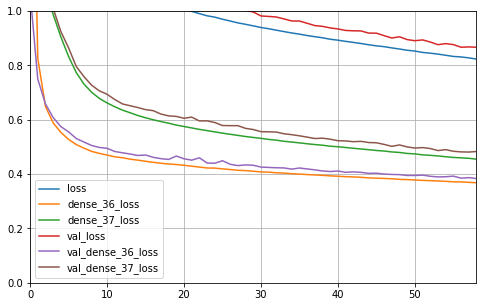

In [45]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [47]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],
               [y_test, y_test])

  32/5160 [..............................] - ETA: 0s - loss: 1.0935 - dense_36_loss: 0.4958 - dense_37_loss: 0.5978

 704/5160 [===>..........................] - ETA: 0s - loss: 0.8361 - dense_36_loss: 0.3966 - dense_37_loss: 0.4395

1504/5160 [=======>......................] - ETA: 0s - loss: 0.8197 - dense_36_loss: 0.3716 - dense_37_loss: 0.4480

2496/5160 [=============>................] - ETA: 0s - loss: 0.8130 - dense_36_loss: 0.3665 - dense_37_loss: 0.4465

3680/5160 [====================>.........] - ETA: 0s - loss: 0.8391 - dense_36_loss: 0.3811 - dense_37_loss: 0.4579



5120/5160 [============================>.] - ETA: 0s - loss: 0.8321 - dense_36_loss: 0.3774 - dense_37_loss: 0.4547

5160/5160 [==============================] - 0s 51us/sample - loss: 0.8316 - dense_36_loss: 0.3770 - dense_37_loss: 0.4546


[0.831632233405298, 0.3769974, 0.45463493]

In [48]:
# 子类API
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        """定义模型的层次"""
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
    
    def call(self, input):
        """完成模型的正向计算"""
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
# model = WideDeepModel()
model = keras.models.Sequential([
    WideDeepModel(),
])

model.build(input_shape=(None, 8))